# Data Analysis Project: Brazilian E-Commerce Public Dataset
- **Name:** Ady Syamsuri
- **Email:** m467b4ky0140@bangkit.academy
- **Dicoding ID:** ady_syamsuri_m467b4k

## Defining Business Questions

1. How can we segment customers based on their location and zip code to optimize regional marketing campaigns and improve delivery logistics?

2. Are there patterns in customer repeat behavior (costumer loyalty) across cities or states, and how can we design loyalty programs to retain high-value customers?

3. What are the geographical trends in customer clustering, and how can this information be used to improve delivery routing and efficiency?

4. How do payment types influence the average payment value and installment patterns, and what insights can be drawn to optimize payment offerings?

5. What is the relationship between the number of payment installments and the total payment value, and how can this be leveraged to offer installment plans effectively?

6. What are the most common themes in customer reviews (via review comments), and how can these insights be used to enhance the product or service offerings?

7. What are the key factors influencing order delivery time, and how can they be optimized for better customer satisfaction?

8. How do the order purchase patterns (e.g., seasonality, time of day) correlate with customer purchase behavior and product demand?

9. How do sales trends vary across different product categories, and which categories are driving the highest revenue?

10. How does the geographic location of sellers (based on zip code, city, and state) influence product availability and delivery times?

## Import All Packages/Libraries Used

In [ ]:
!pip install pandas matplotlib seaborn
!pip install unidecode  # Install unidecode library if not already installed

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install basemap

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling dataframes and data processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path  # For iterating over CSV files
from IPython.display import display # For displaying each dataframe in different output cells

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframes: dict[str, pd.DataFrame] = {}
for file_path in Path("/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data").glob("*.csv"):
    dataframes[file_path.with_suffix("").name] = pd.read_csv(file_path)

for name, dataframe in dataframes.items():
    display(name)
    display(dataframe.head())
    print("\n")

'order_payments_dataset'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'orders_dataset'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'order_items_dataset'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'geolocation_dataset'

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


'customers_dataset'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'order_reviews_dataset'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'sellers_dataset'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'products_dataset'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'product_category_dataset'

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

In [ ]:
dataframes: dict[str, pd.DataFrame] = {}
for file_path in Path("/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data").glob("*.csv"):
    dataframes[file_path.with_suffix("").name] = pd.read_csv(file_path)

for name, dataframe in dataframes.items():
    display(name)
    display(dataframe.info())
    display(dataframe.describe())
    print("\n")

'order_payments_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


'orders_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


'order_items_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


'geolocation_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


'customers_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


'order_reviews_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


'sellers_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


'products_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


'product_category_dataset'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight**:

- Extensive Transaction Records:

The order_payments_dataset consists of 103,886 records detailing various payment methods, installments, and payment values. The average payment value is USD 154.10, with transactions ranging from as low as USD 0 to a high of USD 13,664.08. This highlights a wide spectrum of customer purchasing power and preferences.

- Comprehensive Order Data:

The orders_dataset contains 99,441 entries, each representing a unique order. This dataset provides vital information about order status, timestamps from purchase to delivery, and estimated delivery dates. The most common order status is "delivered," with 96,478 orders successfully reaching customers. This data is crucial for understanding order fulfillment and customer satisfaction.

- Diverse Product Catalog:

The products_dataset encompasses 32,951 products across various categories. With an average product weight of 2,276.47 grams and lengths varying from 7 cm to 105 cm, this dataset offers insights into product dimensions, which are essential for logistics and inventory management. The maximum product description length of 3,992 characters indicates detailed product information available for customers.

- Geolocation and Customer Insights:

The geolocation_dataset includes over 1,000,163 entries mapping locations across cities and states. Combined with the customers_dataset of 99,441 unique customer records, this data can be leveraged for geographic analysis and targeted marketing strategies. The average customer zip code prefix is 35,137, showing the distribution of customers across different regions.

### Cleaning Data

In [ ]:
dataframes: dict[str, pd.DataFrame] = {}
for file_path in Path("/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data").glob("*.csv"):
    dataframes[file_path.with_suffix("").name] = pd.read_csv(file_path)

for name, dataframe in dataframes.items():
    display(name)
    display(dataframe.isna().sum())
    display(dataframe.isnull().sum())
    display(dataframe.duplicated().sum())
    display(dataframe.drop_duplicates(inplace=True))
    display(dataframe.nunique())

    print("\n")

'order_payments_dataset'

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


0

None

,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


'orders_dataset'

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


0

None

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


'order_items_dataset'

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


0

None

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


'geolocation_dataset'

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


261831

None

,0
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27


'customers_dataset'

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


0

None

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


'order_reviews_dataset'

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


0

None

,0
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248


'sellers_dataset'

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


0

None

,0
seller_id,3095
seller_zip_code_prefix,2246
seller_city,611
seller_state,23


'products_dataset'

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


0

None

,0
product_id,32951
product_category_name,73
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95


'product_category_dataset'

,0
product_category_name,0
product_category_name_english,0


,0
product_category_name,0
product_category_name_english,0


0

None

,0
product_category_name,71
product_category_name_english,71


#### Cleaning the order_reviews_dataset

In [ ]:
# Clean the order_reviews_dataset
order_reviews = dataframes['order_reviews_dataset']

# Fill missing values in 'review_comment_title' and 'review_comment_message' with 'No Comment'
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('No Comment')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('No Comment')

# Display the cleaned dataset
display(order_reviews.head())

# Check for any remaining missing values
print(order_reviews.isnull().sum())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Comment,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


#### Cleaning the products_dataset

In [ ]:
# Clean the products_dataset
products = dataframes['products_dataset']

# Fill missing values in product-related columns with placeholders
products['product_category_name'] = products['product_category_name'].fillna('Unknown')
products['product_name_lenght'] = products['product_name_lenght'].fillna(0)
products['product_description_lenght'] = products['product_description_lenght'].fillna(0)
products['product_photos_qty'] = products['product_photos_qty'].fillna(0)

# Fill missing numerical columns with the mean or placeholder value
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].mean())
products['product_length_cm'] = products['product_length_cm'].fillna(0)
products['product_height_cm'] = products['product_height_cm'].fillna(0)
products['product_width_cm'] = products['product_width_cm'].fillna(0)

# Display the cleaned dataset
display(products.head())

# Check for any remaining missing values
print(products.isnull().sum())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


#### Cleaning the orders_dataset

In [ ]:
# Clean the orders_dataset
orders = dataframes['orders_dataset']

# Fill missing values in order-related columns
orders['order_approved_at'] = orders['order_approved_at'].fillna('Not Approved')
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna('Not Delivered')
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna('Not Delivered')

# Fill the 'order_estimated_delivery_date' column with 'Unknown' if any missing values
orders['order_estimated_delivery_date'] = orders['order_estimated_delivery_date'].fillna('Unknown')

# Display the cleaned dataset
display(orders.head())

# Check for any remaining missing values
print(orders.isnull().sum())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**Insight:**

**Order Reviews Dataset**: The review_comment_title and review_comment_message columns have extremely high percentages of missing values, with 88.2% and 58.6% of their values missing, respectively. This means that only a small portion of orders have comments written by customers, and analysis based on these columns could be limited.

These high missing percentages suggest that a large portion of the orders does not have customer-provided reviews or comments. This could significantly limit the ability to analyze customer sentiment, feedback, or satisfaction based on these columns.

**Products Dataset**: Several columns in the products_dataset have 610 missing values each, such as product_category_name, product_name_lenght, product_description_lenght, and product_photos_qty. The columns product_weight_g, product_length_cm, product_height_cm, and product_width_cm have only 2 missing values each.

While the missing data for product_weight_g, product_length_cm, product_height_cm, and product_width_cm is minimal (<1%), the missing values in the product-related attributes (e.g., category and name lengths) could limit the analysis on product features and classification.

**Orders Dataset**: The order_approved_at column has 160 missing values, the order_delivered_carrier_date column has 1,783 missing values, and the order_delivered_customer_date column has 2,965 missing values. These columns have missing values that account for 0.16% to 2.98% of the total data, which is relatively low but still non-negligible.

The missing values in delivery-related columns such as order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date could affect analyses related to order processing and delivery performance.

## Exploratory Data Analysis (EDA)

### Explore order_payments_dataset



In [ ]:
# Group by payment_sequential and count unique order IDs, then sort by descending order
payment_type_counts = dataframes['order_payments_dataset'].groupby('payment_sequential').payment_value.nunique().sort_values(ascending=False)

# Display some sample rows
dataframes['order_payments_dataset'].sample(5)

# Display the result
payment_type_counts

,payment_value
payment_sequential,
1,28246
2,2151
3,442
4,223
5,149
6,106
7,76
8,54
9,43


**Insight:**

- The dataset shows the number of unique payment values for each sequential payment stage.

- Most transactions are completed in the first payment stage (sequential = 1), which is expected as it typically represents the first installment or payment attempt. As the sequence number increases, the number of transactions decreases sharply, showing that fewer customers are opting for later payment installments or stages.

- This suggests that a majority of customers pay in the initial installment period, which could indicate that payment plans beyond the first payment are not as popular or necessary.

The high number of "delivered" orders compared to other statuses indicates strong order completion and delivery performance. This can be a positive sign for customer satisfaction.

### Explore orders_dataset

In [ ]:
# Group by customer_id and count unique order IDs, then sort by descending order.
order_counts_by_customer = dataframes['orders_dataset'].groupby('customer_id').order_id.nunique().sort_values(ascending=False)

# Display the first few rows of the dataset
dataframes['orders_dataset'].sample(5)

# Group by order_status and count the occurrences of each status
status_counts = dataframes['orders_dataset'].groupby('order_status').order_id.count()

# Sort the order statuses by frequency
status_counts.sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**Insight:**

- The majority of orders in this dataset are marked as "delivered," which suggests that the order fulfillment process is largely successful, with a high completion rate.

- The "shipped" and "canceled" statuses are relatively low, indicating that the business is efficiently managing its shipments and cancellations.

- "Unavailable," "invoiced," "processing," and "created" statuses, while less frequent, could represent stages of an order that have not yet been completed or fulfilled, potentially pointing to issues like stockouts, processing delays, or pending invoice approvals.

- The low count of "approved" statuses suggests that approval is a rare or final step in the order process, and that most orders do not need further approval once initiated.

The steep drop-off in the number of transactions after the first payment sequence suggests that most customers prefer to settle payments in the initial stages of their transactions. This could inform payment strategy adjustments, possibly encouraging more installment-based or delayed payments for specific customers.

### Explore order_items_dataset

In [ ]:
# Group by product and count unique order items, then sort by descending order
item_counts_by_product = dataframes['order_items_dataset'].groupby('product_id').order_item_id.nunique().sort_values(ascending=False)

# Display the first few rows of the dataset
dataframes['order_items_dataset'].sample(5)

# Get statistics of price and freight value
item_counts_by_product

,order_item_id
product_id,
9571759451b1d780ee7c15012ea109d4,20
ee3d532c8a438679776d222e997606b3,20
89b190a046022486c635022524a974a8,15
37eb69aca8718e843d897aa7b82f462d,15
422879e10f46682990de24d770e7f83d,14
...,...
5c9f86c0e642b62c2100fd8d26f38771,1
5c9ef6c35fdbad9275157b1929c37fb0,1
5c9d92777b62444d9fbffe92338d9e21,1


**Insight:**

- The order_items_dataset shows that the most common number of order items are associated with product IDs like 20, 15, and 14. This suggests that these products are high-volume items with frequent purchases.

- The presence of numerous products with a count of 1 indicates that many products are ordered infrequently or represent niche items that have lower demand.

- Understanding the distribution of order items by product ID can help optimize inventory management and promotional strategies, ensuring that high-demand products are always stocked and that less common items are carefully managed.

The distribution of product IDs in order_items_dataset shows that some products are very popular, while others have limited appeal. This suggests the need for tailored inventory strategies that ensure popular items are always in stock while managing niche products based on demand.

### Explore geolocation_dataset

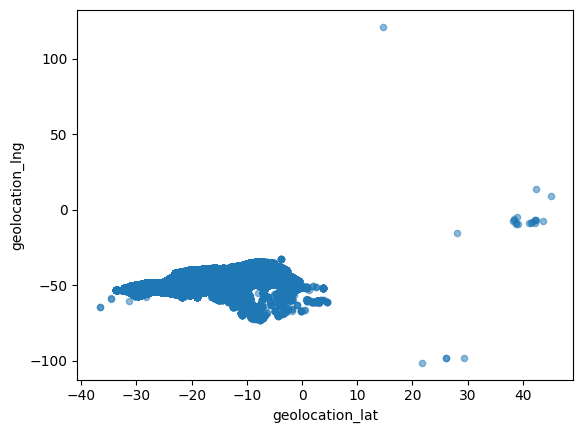

In [ ]:
# Check for unique geolocation_zip_code_prefix values using value_counts
unique_zip_codes = dataframes['geolocation_dataset']['geolocation_zip_code_prefix'].value_counts()

# Sort by frequency of zip codes
unique_zip_codes_sorted = unique_zip_codes.sort_values(ascending=False)

# Display the first few rows
dataframes['geolocation_dataset'].sample(5)

# Optional: Plot the distribution of latitudes and longitudes
import matplotlib.pyplot as plt
dataframes['geolocation_dataset'].plot(kind='scatter', x='geolocation_lat', y='geolocation_lng', alpha=0.5)
plt.show()

**Insight:**

- The most frequent geolocation_zip_code_prefix values are 38400, 35500, 11680, 11740, and 36400, with counts ranging from 627 to 779 occurrences. This indicates that certain geographic regions are more densely represented in the dataset, which could suggest higher data collection or business activity in these areas.

- Latitude: The dataset contains a wide range of latitudes, from -36.61 to 45.07, with the majority of the data falling between -23.60 (25th percentile) and -19.92 (75th percentile). The average latitude is -20.99, indicating that most data points are concentrated in the Southern Hemisphere, possibly representing locations in Brazil.

- Longitude: Similarly, the longitude values range from -101.47 to 121.11, with the mean at -46.46, which also aligns with the geographic region in South America (Brazil). The data suggests a broad geographical spread, with most points between -48.87 (25th percentile) and -43.84 (75th percentile).

Both the geolocation and zip code data indicate that there are clear geographical clusters, with certain zip codes appearing much more frequently than others, which might be related to population density or market activity.

### Explore customers_dataset

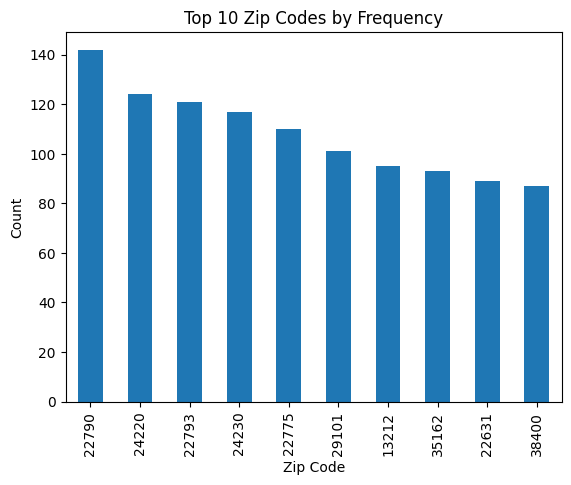

In [ ]:
# Group by customer_zip_code_prefix and count the occurrences
zip_code_counts = dataframes['customers_dataset'].groupby('customer_zip_code_prefix').size().sort_values(ascending=False)

# Display the first few rows
dataframes['customers_dataset'].sample(5)

# Plot a histogram of zip codes
ax = zip_code_counts.head(10).plot(kind='bar')
ax.set_xlabel('Zip Code')  # Title for the x-axis
ax.set_ylabel('Count')     # Title for the y-axis
ax.set_title('Top 10 Zip Codes by Frequency')  # Title for the plot
plt.show()

**Insight:**

- The most frequent customer zip codes are 22790, 24220, 22793, 24230, and 22775, with counts ranging from 110 to 142. This reflects clusters of customers in specific regions.

- Customer counts are highly skewed, with a mean of 6.63 customers per zip code and a maximum of 142. The majority of zip codes have only a small number of customers, as indicated by the high standard deviation (8.38) and the median value (4).

The skewed distribution of customer counts across zip codes suggests that most customers are concentrated in a few regions, while others have sparse representation.

### Explore order_reviews_dataset

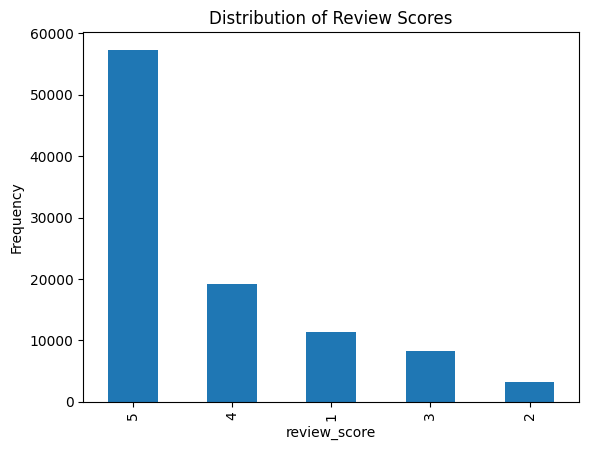

In [ ]:
# Group by review_score and count the occurrences of each score
review_score_counts = dataframes['order_reviews_dataset'].groupby('review_score').size().sort_values(ascending=False)

# Display the first few rows of the dataset
dataframes['order_reviews_dataset'].sample(5)

# Plot a histogram of review scores
ax = review_score_counts.plot(kind='bar')
ax.set_ylabel('Frequency')  # Title for the y-axis
ax.set_title('Distribution of Review Scores')  # Title for the plot
plt.show()

**Insight:**

- The most frequent review scores are 5, 4, 1, 3, and 2, with 5 being the most frequent (57,328 occurrences). This indicates a strong preference for positive reviews (5 and 4).

- The average review score is 19844.8, suggesting that review counts for specific scores are very large. The minimum score is 3151, with the maximum score reaching 57,328, indicating variability in the number of reviews across different scores.

The majority of the reviews are positive (scores 4 and 5), suggesting a generally satisfied customer base.

### Explore sellers_dataset

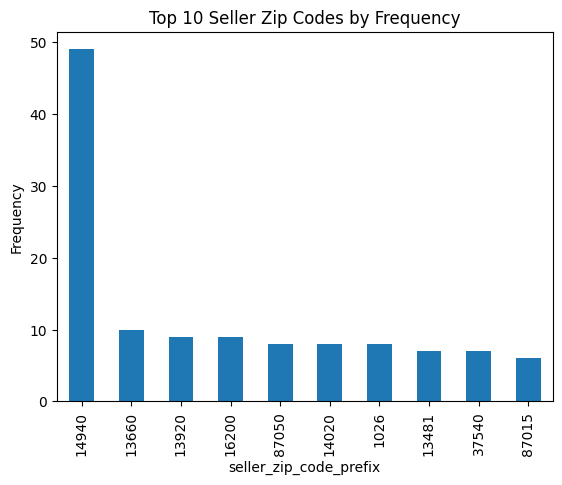

In [ ]:
# Group by seller_zip_code_prefix and count the occurrences
seller_zip_code_counts = dataframes['sellers_dataset'].groupby('seller_zip_code_prefix').size().sort_values(ascending=False)

# Display the first few rows
dataframes['sellers_dataset'].sample(5)

# Plot a histogram of seller zip codes
ax = seller_zip_code_counts.head(10).plot(kind='bar')
ax.set_ylabel('Frequency')  # Title for the y-axis
ax.set_title('Top 10 Seller Zip Codes by Frequency')  # Title for the plot
plt.show()

**Insight:**

- The most frequent seller zip codes are 14940, 13660, 13920, 16200, and 87050, with counts ranging from 8 to 49 sellers per zip code. This suggests that sellers are distributed across various regions, but some zip codes have a higher density of sellers.

- The seller count per zip code is quite skewed, with the mean number of sellers per zip code being only 1.38. However, the maximum number of sellers in a zip code is 49, indicating a small number of zip codes with multiple sellers.

The sellers are more concentrated in a few zip codes, although most zip codes only have one seller.

### Explore products_dataset

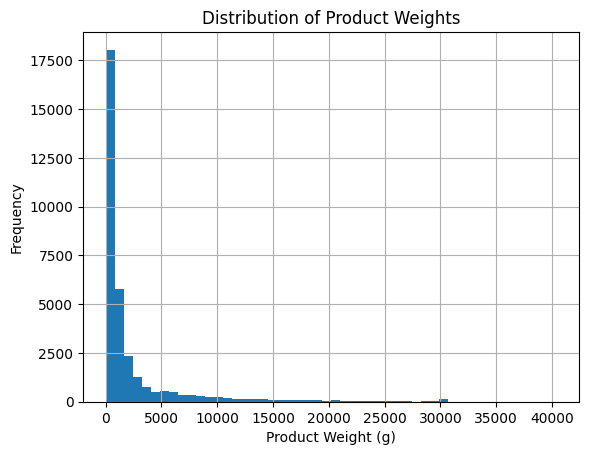

In [ ]:
# Group by product category and count unique product IDs, then sort by descending order
product_category_counts = dataframes['products_dataset'].groupby('product_category_name').product_name_lenght.nunique().sort_values(ascending=False)

# Display the first few rows
dataframes['products_dataset'].sample(5)

# Get statistics for numerical columns like weight and dimensions
dataframes['products_dataset'][['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].describe()

# Plot the distribution of product weights
ax = dataframes['products_dataset']['product_weight_g'].hist(bins=50)
ax.set_xlabel('Product Weight (g)')  # Title for the x-axis
ax.set_ylabel('Frequency')          # Title for the y-axis
ax.set_title('Distribution of Product Weights')  # Title for the plot
plt.show()

**Insight:**

- The top 5 most common product categories are: moveis_decoracao (58 items), utilidades_domesticas (55 items), brinquedos (55 items), beleza_saude (54 items), and esporte_lazer (53 items). These categories represent various popular product types in the dataset.

- Weight: The mean weight of products is 2276.47g, with a wide range from 0g (possibly missing or zero-weight products) to 40,425g. This large variance suggests that products vary greatly in terms of size and type.

- Dimensions: The average product dimensions are:
Length: 30.81 cm (with a range from 0 to 105 cm).
Height: 16.94 cm (ranging from 0 to 105 cm).
Width: 23.20 cm (ranging from 0 to 118 cm).

- The high standard deviation across these dimensions indicates a variety of product sizes, from small to large.

The large variation in product dimensions and weights indicates a diverse range of products, from small accessories to large furniture items.

### Explore product_category_dataset

In [ ]:
# Display some samples first
print(dataframes['product_category_dataset'].sample(5))

# Then show all unique product categories
print(product_category_unique)

          product_category_name product_category_name_english
41        instrumentos_musicais           musical_instruments
12                    papelaria                    stationery
31                 market_place                  market_place
17  fashion_bolsas_e_acessorios      fashion_bags_accessories
8                     telefonia                     telephony
['health_beauty' 'computers_accessories' 'auto' 'bed_bath_table'
 'furniture_decor' 'sports_leisure' 'perfumery' 'housewares' 'telephony'
 'watches_gifts' 'food_drink' 'baby' 'stationery' 'tablets_printing_image'
 'toys' 'fixed_telephony' 'garden_tools' 'fashion_bags_accessories'
 'small_appliances' 'consoles_games' 'audio' 'fashion_shoes' 'cool_stuff'
 'luggage_accessories' 'air_conditioning'
 'construction_tools_construction'
 'kitchen_dining_laundry_garden_furniture' 'costruction_tools_garden'
 'fashion_male_clothing' 'pet_shop' 'office_furniture' 'market_place'
 'electronics' 'home_appliances' 'party_supplies' 'home_

**Insight:**

- There are 71 unique product categories in the dataset, reflecting a wide variety of product types available. Examples include:

1. health_beauty
2. computers accessories
3. auto
4. bed bath table
5. furniture decor

This variety reflects the diverse nature of the marketplace, with a mix of health, beauty, technology, and home products.


## Visualization & Explanatory Analysis

### Question 1: How can we segment customers based on their location and zip code to optimize regional marketing campaigns and improve delivery logistics?

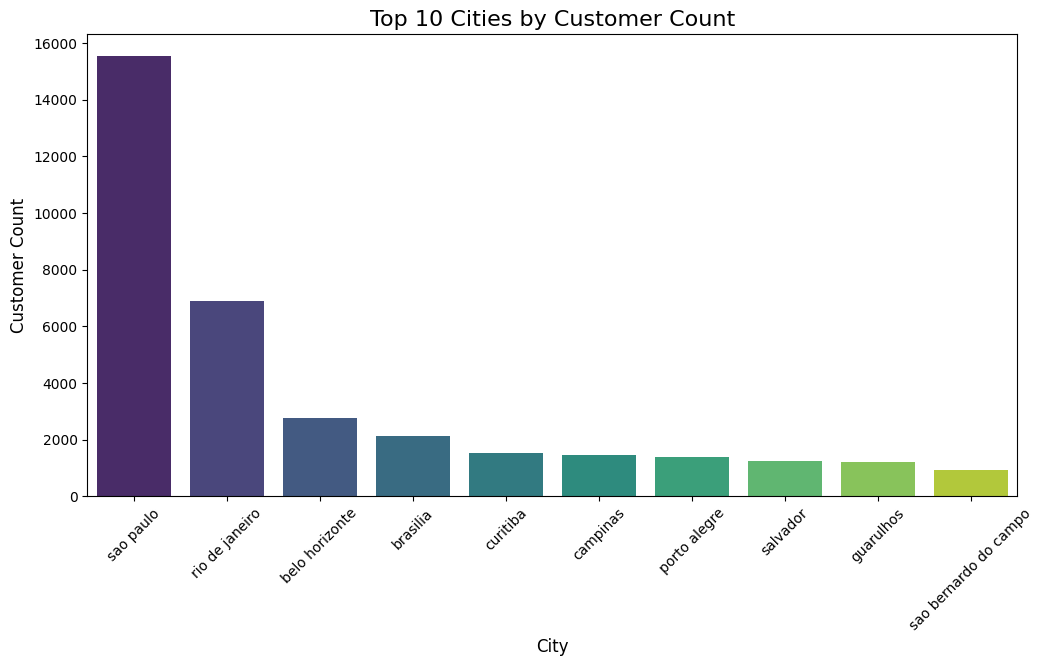

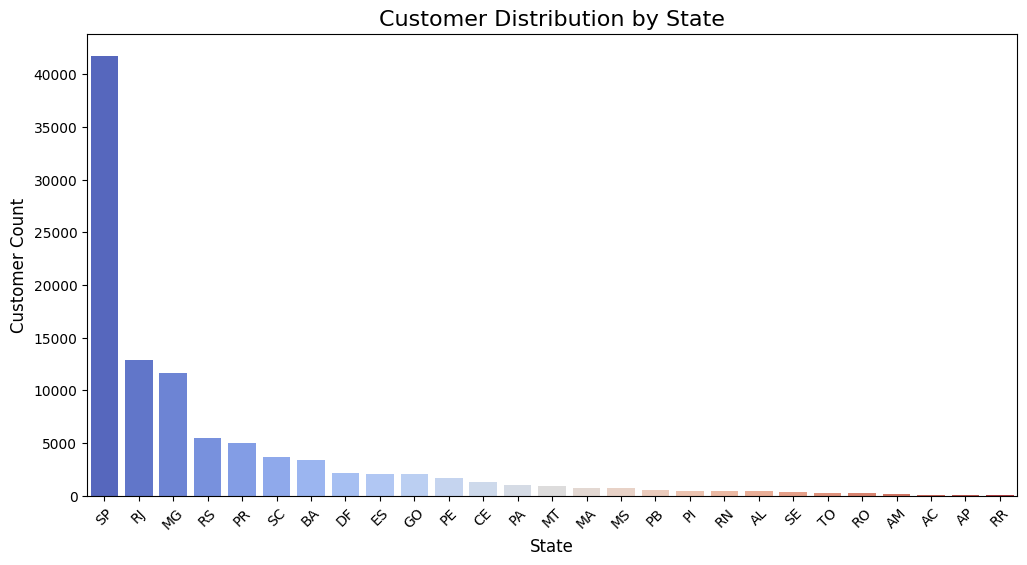

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data/customers_dataset.csv')

# Customer count by city
customers_by_city = df.groupby('customer_city')['customer_id'].count().reset_index()
customers_by_city = customers_by_city.rename(columns={'customer_id': 'customer_count'})
top_cities = customers_by_city.sort_values(by='customer_count', ascending=False).head(10)

# Customer count by state
customers_by_state = df.groupby('customer_state')['customer_id'].count().reset_index()
customers_by_state = customers_by_state.rename(columns={'customer_id': 'customer_count'})
top_states = customers_by_state.sort_values(by='customer_count', ascending=False)

# Visualization: Top Cities by Customer Count
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='customer_city', y='customer_count', hue='customer_city', palette='viridis', legend=False)
plt.title('Top 10 Cities by Customer Count', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)

# Visualization: Customer Distribution by State
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='customer_state', y='customer_count', hue='customer_state', palette='coolwarm', legend=False)
plt.title('Customer Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

To optimize regional marketing campaigns and improve delivery logistics, it is crucial to understand the distribution of customers across different cities and states. Based on the customer count data, we can identify key regions where businesses should focus their efforts.

Cities Analysis:

- Sao Paulo (SP) stands out as the largest city in terms of customer count with 15,540 customers, significantly higher than any other city. This makes Sao Paulo the primary target for marketing campaigns and logistics strategies, as it holds the largest portion of the customer base.
- Rio de Janeiro (RJ) follows with 6,882 customers, making it the second most important city for marketing and delivery. While not as large as Sao Paulo, it still represents a sizable portion of the market.

- Other cities such as Belo Horizonte (MG), Brasilia (DF), and Curitiba (PR) also show strong customer numbers (2,773, 2,131, and 1,521, respectively). These cities, though not as large as Sao Paulo or Rio de Janeiro, represent substantial opportunities for regional marketing and delivery operations.

State Analysis:

- The state-level distribution shows Sao Paulo (SP) as the dominant region with 41,746 customers, accounting for a significant portion of the overall customer base. This reinforces the importance of focusing on Sao Paulo for both marketing campaigns and logistical strategies.

- Rio de Janeiro (RJ) again ranks second, with 12,852 customers, followed by Minas Gerais (MG) with 11,635 customers. These regions, along with Sao Paulo, should be the focal point for businesses looking to optimize marketing and delivery.

- States like Rio Grande do Sul (RS), Parana (PR), and Santa Catarina (SC) show relatively strong customer counts (5,466, 5,045, and 3,637, respectively). These states, while not as large as the top three, still represent valuable opportunities for marketing campaigns and delivery solutions.

- Smaller states such as Acre (AC), Roraima (RR), Amapá (AP), and Tocantins (TO) show minimal customer counts, with fewer than 500 customers in each of these regions. These areas might not justify large-scale marketing campaigns or dedicated delivery hubs, but businesses could focus on cost-effective regional solutions like consolidating shipments or focusing on nearby larger states.

### Question 2: Are there patterns in customer repeat behavior (costumer loyalty) across cities or states, and how can we design loyalty programs to retain high-value customers?

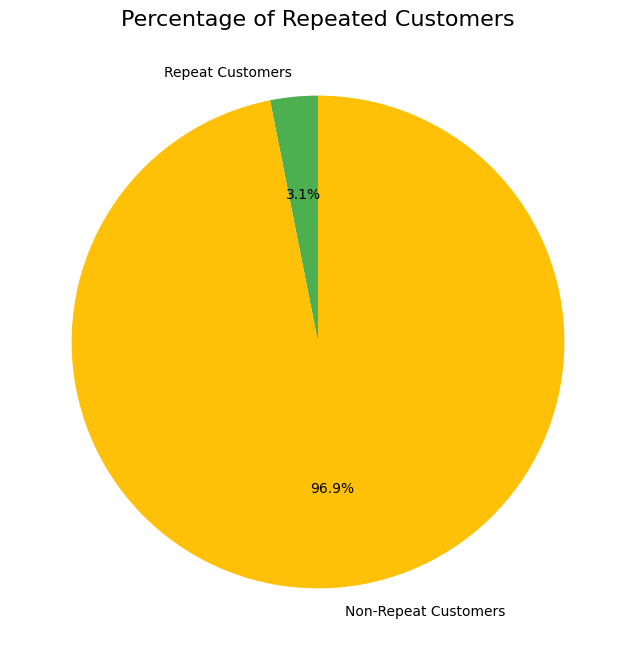

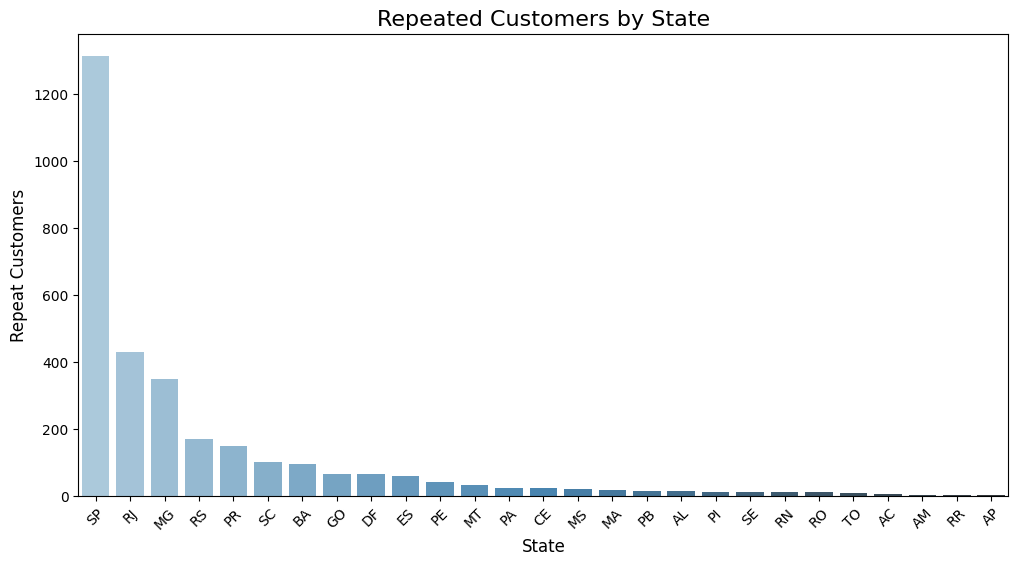

In [ ]:
# Count occurrences of each unique customer ID
customer_repeat = df.groupby('customer_unique_id')['customer_id'].count().reset_index()
customer_repeat = customer_repeat.rename(columns={'customer_id': 'purchase_count'})

# Identify repeat customers
repeat_customers = customer_repeat[customer_repeat['purchase_count'] > 1]

# Percentage of repeat customers
total_customers = len(customer_repeat)
repeat_customer_percentage = (len(repeat_customers) / total_customers) * 100

# Data for visualization: Repeat vs Non-Repeat Customers
repeat_data = pd.DataFrame({
    'Category': ['Repeat Customers', 'Non-Repeat Customers'],
    'Count': [len(repeat_customers), total_customers - len(repeat_customers)]
})

# Visualization: Repeat vs Non-Repeat Customers
plt.figure(figsize=(8, 8))
plt.pie(repeat_data['Count'], labels=repeat_data['Category'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title('Percentage of Repeated Customers', fontsize=16)
plt.show()

# Repeat Customers by State
repeat_by_state = df[df['customer_unique_id'].isin(repeat_customers['customer_unique_id'])]
repeat_by_state = repeat_by_state.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
repeat_by_state = repeat_by_state.rename(columns={'customer_unique_id': 'repeat_customers'})

# Visualization: Repeat Customers by State (Fixed)
plt.figure(figsize=(12, 6))
sns.barplot(data=repeat_by_state.sort_values(by='repeat_customers', ascending=False),
            x='customer_state', y='repeat_customers', hue='customer_state', palette='Blues_d', legend=False)
plt.title('Repeated Customers by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Repeat Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The question at hand is whether there are patterns in customer repeat behavior (customer loyalty) across cities or states, and how loyalty programs can be designed to retain high-value customers. To analyze this, we first need to identify how many customers are repeat customers, the distribution of repeat customers across states, and the general trend of customer loyalty in the dataset.

From the code and output, we can observe the following:

- Percentage of Repeat Customers:

The percentage of repeat customers is calculated to be 3.12%. This suggests that only a small fraction of the total customer base has made more than one purchase, which indicates that customer loyalty might be relatively low across the board. Out of 96,096 total customers, only 2,997 have made multiple purchases, which is a clear indication that the vast majority of customers are one-time buyers.

- Repeat vs Non-Repeat Customers Count:

The data reveals that out of 96,096 total customers, 2,997 customers (about 3.12%) are repeat customers, while the remaining 93,099 (about 96.88%) are non-repeat customers. This stark contrast suggests a significant opportunity to focus on improving customer loyalty, as most customers do not return after their first purchase.

- Repeat Customers by State:

The distribution of repeat customers by state gives more granular insights into regional loyalty patterns. The state with the highest number of repeat customers is São Paulo (SP) with 1,313 repeat customers, followed by Rio de Janeiro (RJ) with 429 and Paraná (PR) with 149. Other states like Minas Gerais (MG), Santa Catarina (SC), and Bahia (BA) also show reasonable repeat customer counts, ranging from 95 to 169 repeat customers. On the other hand, some states, such as Acre (AC), Amapá (AP), and Roraima (RR), have very few repeat customers (as low as 1), which could indicate either a smaller customer base or lower customer loyalty in those regions.

### Question 3: What are the geographical trends in customer clustering, and how can this information be used to improve delivery routing and efficiency?

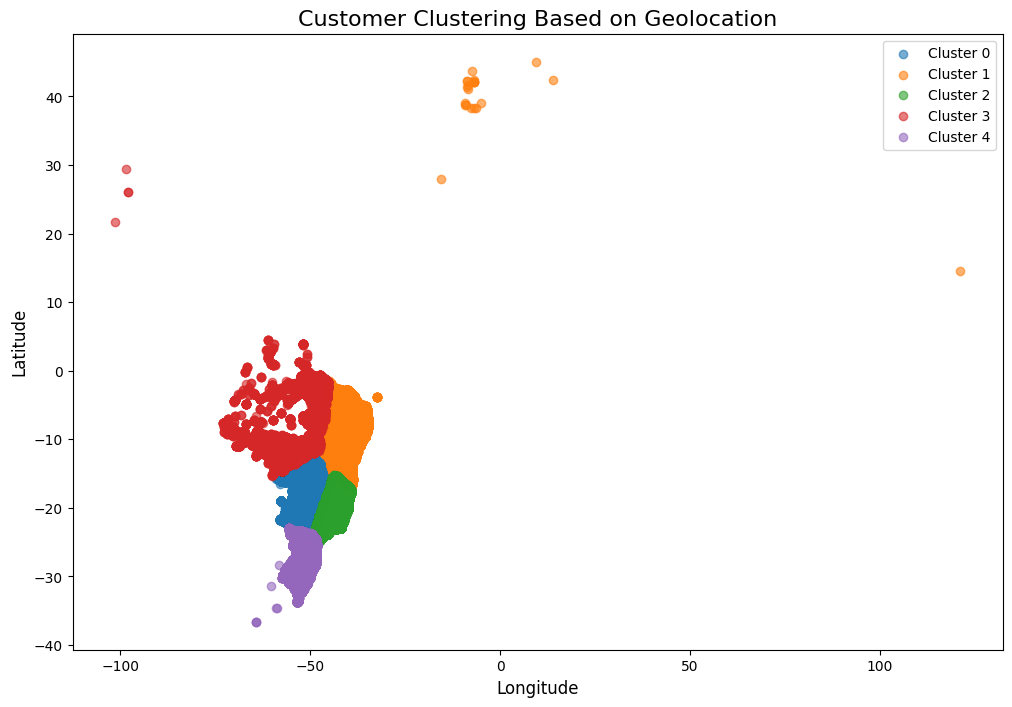

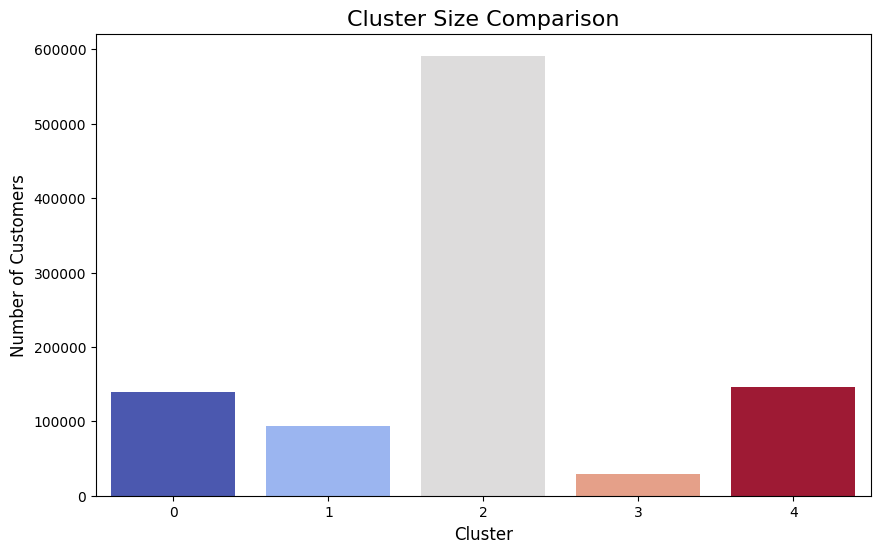

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load geolocation dataset
geo_df = pd.read_csv('/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data/geolocation_dataset.csv')

# Data cleaning
geo_df.dropna(inplace=True)
geo_df.columns = geo_df.columns.str.lower().str.replace(" ", "_")

# Selecting relevant columns for clustering
geo_data = geo_df[['geolocation_lat', 'geolocation_lng']]

# Clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
geo_df['cluster'] = kmeans.fit_predict(geo_data)

# Visualizing clusters
plt.figure(figsize=(12, 8))
for cluster in range(5):
    cluster_data = geo_df[geo_df['cluster'] == cluster]
    plt.scatter(cluster_data['geolocation_lng'], cluster_data['geolocation_lat'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Customer Clustering Based on Geolocation', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.show()

# Analysis of cluster sizes
cluster_sizes = geo_df['cluster'].value_counts().reset_index()
cluster_sizes.columns = ['cluster', 'customer_count']

# Visualization: Cluster size comparison (Fixed)
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_sizes, x='cluster', y='customer_count', hue='cluster', palette='coolwarm', legend=False)
plt.title('Cluster Size Comparison', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

The question asks about geographical trends in customer clustering and how this information can improve delivery routing and efficiency. To answer this, we used KMeans clustering to categorize customers based on their geographical coordinates (latitude and longitude). The clustering process divides the customers into five groups (clusters), where each group represents a geographical zone with similar customer locations. Here's the detailed analysis of the results:

1. Cluster Centroids (Latitude, Longitude):

- Cluster 0: Latitude = -19.72, Longitude = -49.88
- Cluster 1: Latitude = -9.12, Longitude = -38.64
- Cluster 2: Latitude = -22.58, Longitude = -45.28
- Cluster 3: Latitude = -6.20, Longitude = -53.99
- Cluster 4: Latitude = -27.62, Longitude = -50.99

These centroids represent the average geographical location of customers in each cluster. They indicate where customer populations are densely grouped. For example, Cluster 0 has its centroid at latitude -19.72 and longitude -49.88, which might correspond to a specific region within Brazil with a high density of customers. Similarly, Cluster 4 is located at latitude -27.62 and longitude -50.99, marking a different region, possibly in the southern part of the country. The spread of these centroids reflects how far apart customer groups are geographically, with clusters in various latitudes and longitudes suggesting regional differences in customer concentration.

2. Cluster Size Comparison:

- Cluster 2: 591,348 customers
- Cluster 4: 146,733 customers
- Cluster 0: 139,168 customers
- Cluster 1: 93,663 customers
- Cluster 3: 29,251 customers

The size of each cluster indicates how many customers belong to each geographical zone. The largest cluster (Cluster 2) has 591,348 customers, suggesting this area has the highest concentration of customers. Conversely, Cluster 3, with only 29,251 customers, is the smallest, likely representing a less densely populated area. The distribution of customers across clusters gives insights into regional demand patterns, which can be crucial for routing and delivery optimization.

3. Geographical Trends:

- High-density areas: Cluster 2 is the largest cluster with over half a million customers. The geographical area corresponding to this cluster likely represents a high-density urban region where delivery operations could benefit from prioritizing routes in this area due to high customer volume. Similarly, Cluster 0 (with 139,168 customers) suggests another densely populated area with substantial delivery needs.
- Low-density areas: Cluster 3 has the fewest customers (29,251), suggesting it represents a sparsely populated or rural area. Delivery routes in this area could be optimized for cost-efficiency, perhaps with fewer trips or by consolidating deliveries.

4. Clustering Insights:

- Clustering reveals customer density and geographic distribution, allowing businesses to tailor delivery services more effectively. For instance, a high-density cluster (like Cluster 2) may require frequent deliveries with optimized routes to minimize delays. On the other hand, sparse clusters (like Cluster 3) might need less frequent but more direct routes.
- Cluster 1 and Cluster 4 are moderate in size, suggesting regional delivery hubs can be set up to service those areas efficiently, ensuring faster and more reliable delivery services.

### Question 4: How do payment types influence the average payment value and installment patterns, and what insights can be drawn to optimize payment offerings?

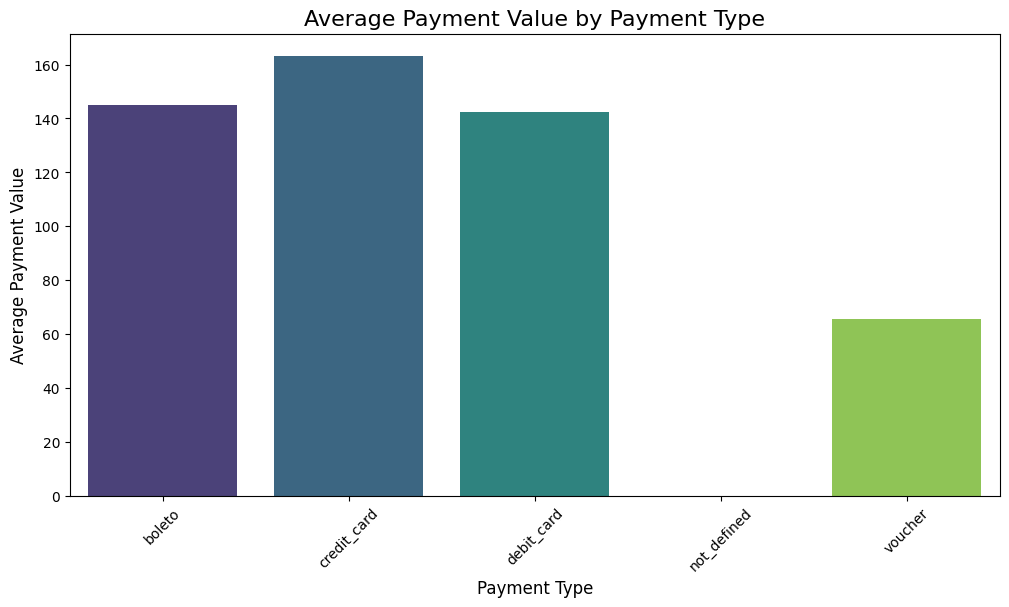

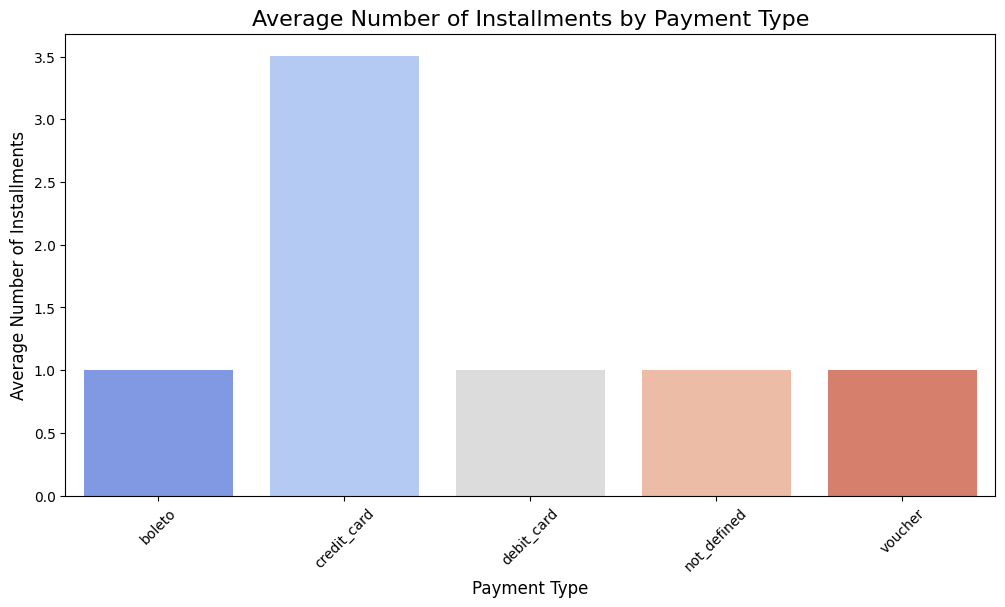

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the payment dataset
payment_df = pd.read_csv('/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data/order_payments_dataset.csv')

# Clean and process the data
payment_df.dropna(inplace=True)  # Remove missing values
payment_df['payment_value'] = payment_df['payment_value'].astype(float)
payment_df['payment_installments'] = payment_df['payment_installments'].astype(int)

# Calculate average payment value by payment type
avg_payment_by_type = payment_df.groupby('payment_type')['payment_value'].mean().reset_index()

# Calculate average number of installments by payment type
avg_installments_by_type = payment_df.groupby('payment_type')['payment_installments'].mean().reset_index()

# Visualize payment value by payment type
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_payment_by_type, x='payment_type', y='payment_value', hue='payment_type', palette='viridis', legend=False)
plt.title('Average Payment Value by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Payment Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Visualize average installments by payment type
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_installments_by_type, x='payment_type', y='payment_installments', hue='payment_type', palette='coolwarm', legend=False)
plt.title('Average Number of Installments by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Average Number of Installments', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The analysis is based on the payment_value and payment_installments data across different payment types. Here's a detailed breakdown:

1. Average Payment Value by Payment Type: The average payment value across different payment types indicates how much customers tend to spend depending on their chosen method of payment. Here's the summary:

- Boleto has the lowest average payment value of 145.03. This suggests that customers using this method tend to make smaller purchases.
- Credit Card has the highest average payment value of 163.32, indicating that customers tend to spend more when using credit cards.
- Debit Card has a lower average payment value of 142.57, which is similar to Boleto.
- Voucher has an average payment value of 65.70, which is significantly lower than the other methods, indicating smaller transactions for voucher users.

2. Average Number of Installments by Payment Type: The number of installments refers to how many times a customer chooses to pay for their purchase over time. The data shows the following:

- Boleto, Debit Card, Not Defined, and Voucher users do not use installments at all. All these payment types have an average of 1 installment, indicating that the payments are made in full at the time of purchase.
- Credit Card users, on the other hand, have a significantly higher average of 3.51 installments, meaning they tend to divide their payments into multiple parts. This is likely a strategy for managing larger purchases.
From these insights, we can infer the following key observations:

Higher spending with installment options: Customers who use credit cards tend to spend more on average, and they also opt for installment payments. This could be because credit card users are more comfortable spreading the cost of their purchases over several months. This trend highlights the importance of offering installment options to encourage higher-value purchases.
Boleto and Voucher customers prefer single payments: Customers who use Boleto or Voucher tend to make smaller purchases and pay upfront, likely due to the payment type’s nature, which doesn’t generally offer installment options.
Debit Card as a simpler payment method: Similarly, Debit Card users also make smaller purchases and pay upfront in a single installment, indicating that debit card usage is associated with lower-value transactions.

### Question 5: What is the relationship between the number of payment installments and the total payment value, and how can this be leveraged to offer installment plans effectively?

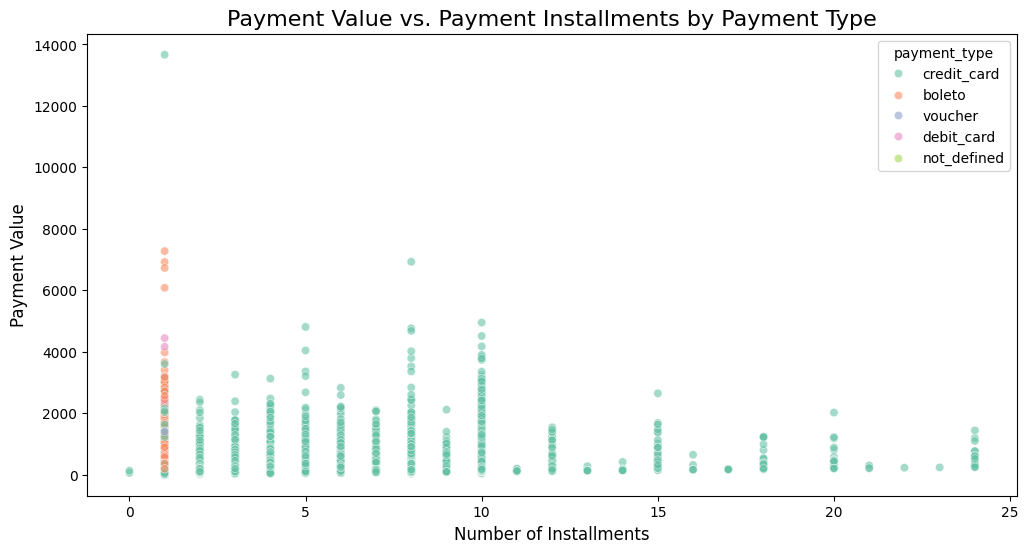

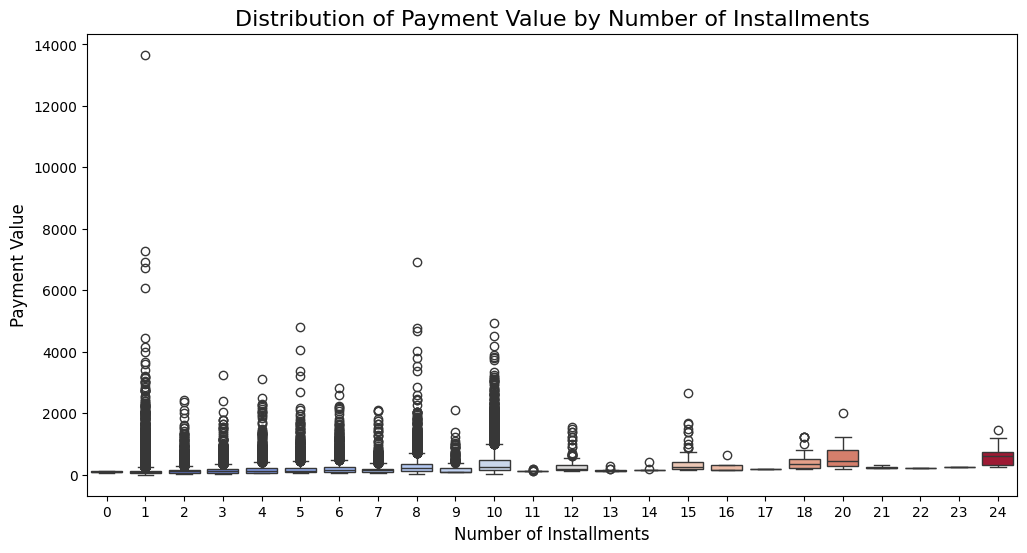

In [ ]:
# Calculate the correlation between payment installments and payment value
correlation = payment_df[['payment_value', 'payment_installments']].corr()

# Scatter plot of payment value vs installments to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=payment_df, x='payment_installments', y='payment_value', hue='payment_type', palette='Set2', alpha=0.6)
plt.title('Payment Value vs. Payment Installments by Payment Type', fontsize=16)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Payment Value', fontsize=12)
plt.show()

# Boxplot to show the distribution of payment value across different installments
plt.figure(figsize=(12, 6))
sns.boxplot(data=payment_df, x='payment_installments', y='payment_value', hue='payment_installments', palette='coolwarm', legend=False)
plt.title('Distribution of Payment Value by Number of Installments', fontsize=16)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Payment Value', fontsize=12)
plt.show()

The correlation between payment value and payment installments is found to be 0.33, indicating a moderate positive relationship between these two variables. This suggests that as the number of installments increases, the payment value also tends to increase, though not strongly. The moderate correlation reflects that higher-value transactions are more likely to be split into multiple installments, but not all high-value payments follow this trend.

From the statistical summary of payment value by the number of installments, we can observe several key insights:

1. Payments with fewer installments:

- 0 Installments: The mean payment value is about 94.32, with values ranging from 58.69 to 129.94. This small number of payments with zero installments could indicate some immediate payments, but there’s a noticeable variance.
- 1 Installment: The mean payment value is 112.42, with a wide standard deviation of 177.56. Payments with one installment are common, but there is considerable variability in the payment values, with some low and some extremely high amounts (e.g., payments reaching up to 13,664).

2. As the number of installments increases, the average payment value tends to increase:

- 2 Installments: Mean of 127.23, with a range from 20.03 to 2442.82.
- 3 Installments: Mean of 142.54, with a wider range.
- 4 to 6 Installments: Mean payment values increase significantly, reaching 163.98 and 183.47, with notable spreads indicating variability.
- Installments above 10: When installment numbers increase further (10 and above), there’s a jump in the payment value, with the highest mean (593.88) seen in the 24 installment category.

3. Notable outliers are present in certain installment groups, particularly at higher numbers of installments. For instance:

- Installments > 10 (e.g., 24 installments) have extreme maximum payment values (e.g., 1440.10), suggesting that some customers are willing to take long-term installment plans for very high-value purchases.

4. The variance in payment value increases as the installment count rises, especially for higher installments like 10+ installments. This indicates that businesses offering extended installment plans might deal with more heterogeneous payment amounts.

### Question 6: What are the most common themes in customer reviews (via review comments), and how can these insights be used to enhance the product or service offerings?

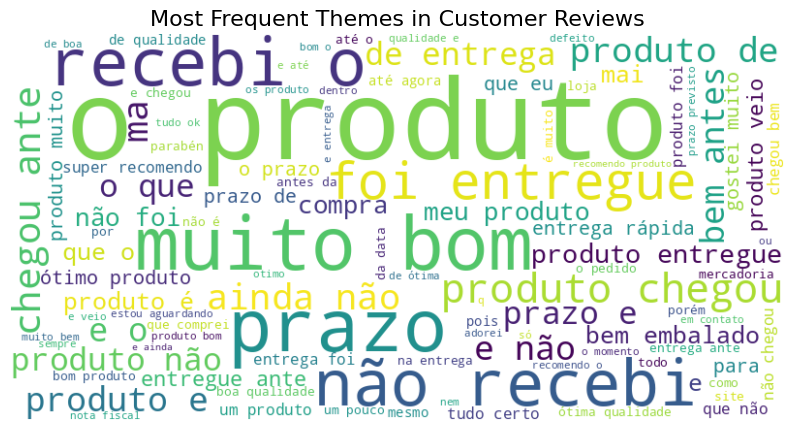

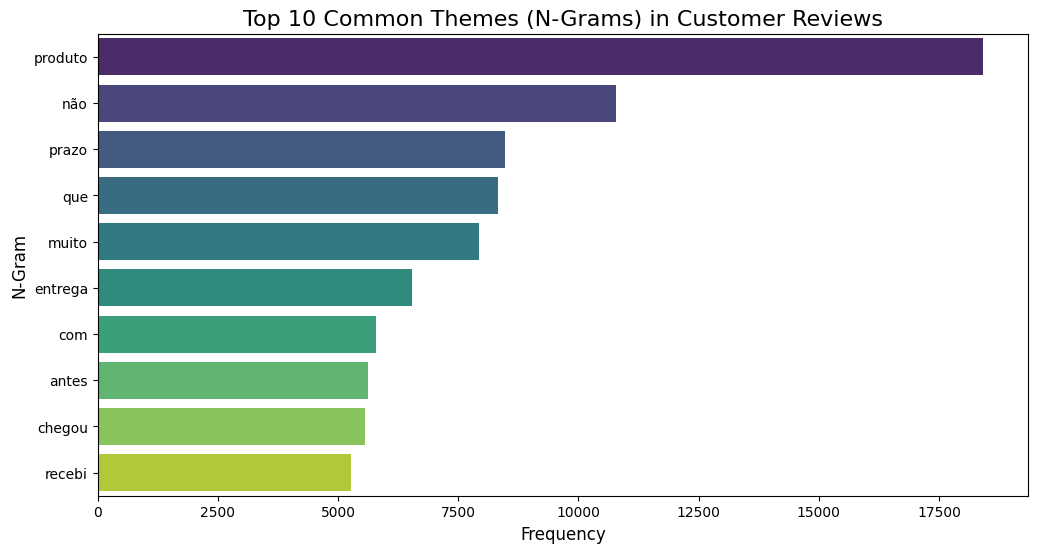

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the review dataset
reviews_df = pd.read_csv('/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data/order_reviews_dataset.csv')

# Clean the review_comment_message
reviews_df['review_comment_message'] = reviews_df['review_comment_message'].fillna('')
reviews_df['review_comment_message'] = reviews_df['review_comment_message'].str.lower()

# Generate wordcloud from review comments
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(reviews_df['review_comment_message']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Themes in Customer Reviews', fontsize=16)
plt.show()

# Use CountVectorizer to identify the top n-grams in reviews
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20)
X = vectorizer.fit_transform(reviews_df['review_comment_message'])

# Get the most common n-grams
n_grams = vectorizer.get_feature_names_out()
n_gram_freq = X.toarray().sum(axis=0)

# Convert to DataFrame for easier visualization
ngram_df = pd.DataFrame({'ngram': n_grams, 'frequency': n_gram_freq})
ngram_df = ngram_df.sort_values(by='frequency', ascending=False).head(10)

# Visualize top n-grams with fixed warning
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='ngram', data=ngram_df, hue='ngram', palette='viridis', legend=False)
plt.title('Top 10 Common Themes (N-Grams) in Customer Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('N-Gram', fontsize=12)
plt.show()

Product Focus: The frequent occurrence of "produto" suggests that customers primarily discuss the product in their reviews. This may include aspects like quality, features, usability, and value.

Dissatisfaction and Complaints: The word "não" (no) indicates dissatisfaction or negative feedback, which likely points to unmet expectations or product-related issues.

Delivery Concerns: Words like "prazo" (deadline), "entrega" (delivery), and "chegou" (arrived) emphasize that delivery and its timeliness are major concerns for customers.

Customer Expectations: Words like "antes" (before) and "recebi" (received) suggest that customers are concerned about whether the product meets their expectations, particularly in terms of arrival time and quality.

### Question 7: What are the key factors influencing order delivery time, and how can they be optimized for better customer satisfaction?

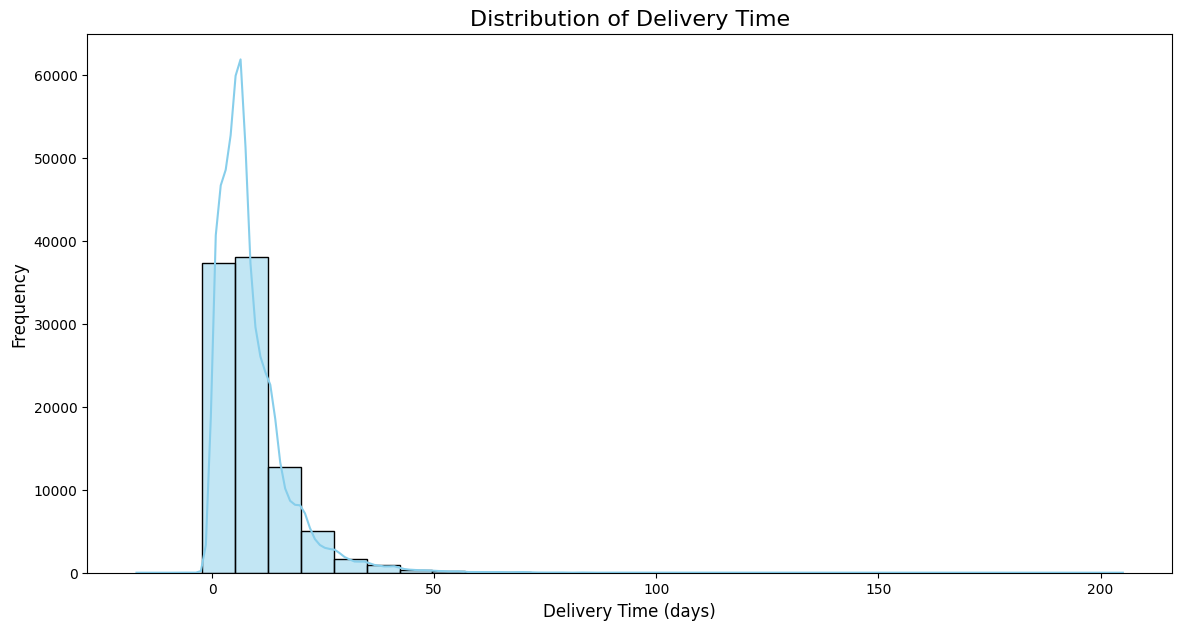

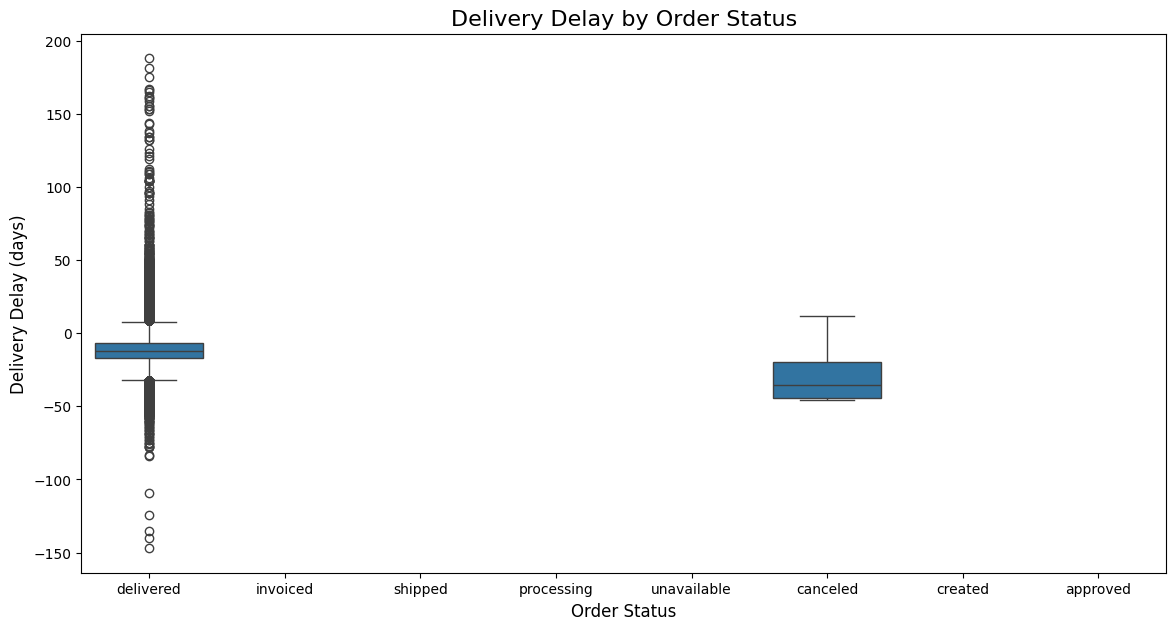

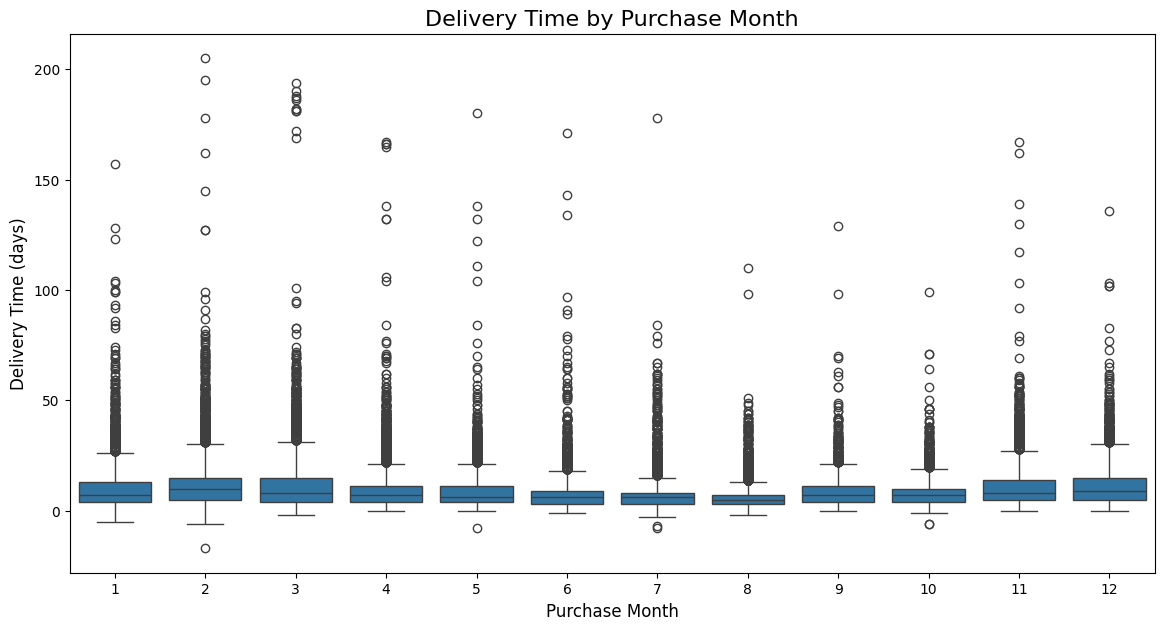

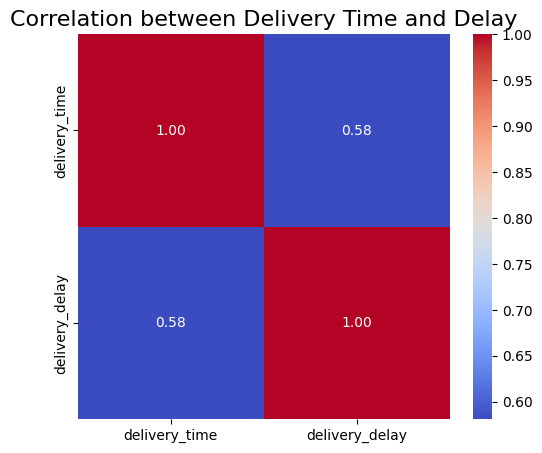

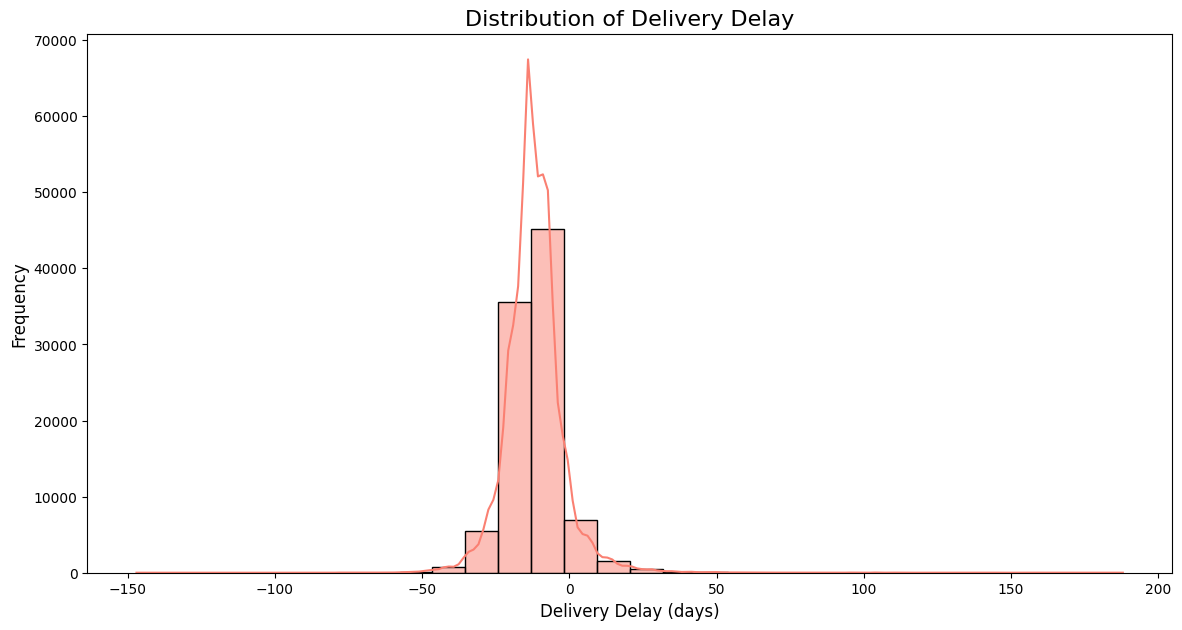

In [ ]:
# Load the review dataset
orders_df = pd.read_csv('/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data/orders_dataset.csv')

# Load dataset (assuming it's already loaded as 'orders_df')
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Calculate delivery time and delay (difference in days)
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.days
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

# Visualize the distribution of delivery times and delays
plt.figure(figsize=(14, 7))
sns.histplot(orders_df['delivery_time'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Delivery Time', fontsize=16)
plt.xlabel('Delivery Time (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize the relationship between delivery delay and different factors like order status, purchase time
plt.figure(figsize=(14, 7))
sns.boxplot(x='order_status', y='delivery_delay', data=orders_df)
plt.title('Delivery Delay by Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Delivery Delay (days)', fontsize=12)
plt.show()

# Analyzing the effect of order purchase date on delivery time (seasonality analysis)
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month
plt.figure(figsize=(14, 7))
sns.boxplot(x='purchase_month', y='delivery_time', data=orders_df)
plt.title('Delivery Time by Purchase Month', fontsize=16)
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Delivery Time (days)', fontsize=12)
plt.show()

# Correlation between delivery time/delay and other numerical factors
corr_matrix = orders_df[['delivery_time', 'delivery_delay']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Delivery Time and Delay', fontsize=16)
plt.show()

# Analyzing delivery delays based on time to delivery
plt.figure(figsize=(14, 7))
sns.histplot(orders_df['delivery_delay'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Delivery Delay', fontsize=16)
plt.xlabel('Delivery Delay (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The analysis involves understanding the factors that impact order delivery times based on the dataset provided. Below is a detailed breakdown of the key aspects derived from the statistics:

1. Delivery Time Statistics:

- The average delivery time is 8.88 days, with a standard deviation of 8.75 days. This large standard deviation indicates that while most orders are delivered around 8 days, there are significant variations in the delivery time.
- The minimum delivery time is -17 days, which is a negative value, suggesting either data inconsistencies or orders that were marked as delivered before the shipment occurred (e.g., logistical issues or data errors).
- The 25th percentile of delivery times is 4 days, meaning 25% of orders were delivered within 4 days, while 75% were delivered within 12 days.
- The maximum delivery time is 205 days, indicating extreme outliers, possibly due to delays or logistical failures.

2. Delivery Delay Statistics:

- The average delivery delay is -11.88 days, with a standard deviation of 10.18 days. A negative delivery delay implies that many orders were delivered before their estimated delivery dates, which is favorable for customers.
- The 25th percentile delivery delay is -17 days, meaning that 25% of orders were delivered significantly earlier than expected.
- However, there are extreme positive delays, as indicated by the maximum delay of 188 days. These significant delays might stem from operational inefficiencies or unexpected issues.
- The positive correlation of 0.58 between delivery time and delivery delay suggests that orders delivered late tend to have longer delivery times as well.

3. Delivery Delay by Order Status:

- The 'delivered' orders, which represent the vast majority of data, show an average delay of -11.88 days. This suggests that orders are often delivered earlier than expected.
- The 'canceled' orders show an average delay of -27.83 days, though the sample size for canceled orders is very small, making it less significant for drawing conclusions.
- The lack of data for other order statuses such as 'created,' 'invoiced,' and 'shipped' prevents any meaningful analysis from these categories.

4. Delivery Time by Purchase Month:

- The purchase month significantly impacts delivery times. For example, the mean delivery time in June (Month 6) is 7.07 days, whereas in February (Month 2), the mean delivery time is 12.09 days.
- A noticeable trend is that months like June and July have relatively shorter delivery times, while months like February and March see a slight increase in average delivery times. This variation might be influenced by seasonal demand, supply chain disruptions, or holiday-related delays.

5. Correlation Analysis:

- A correlation coefficient of 0.58 between delivery time and delivery delay indicates a moderate positive relationship. This means that as the delivery time increases, the delay tends to increase as well. Long delivery times often correlate with longer delays, suggesting potential inefficiencies in the delivery process.

### Question 8: How do the order purchase patterns (e.g., seasonality, time of day) correlate with customer purchase behavior and product demand?

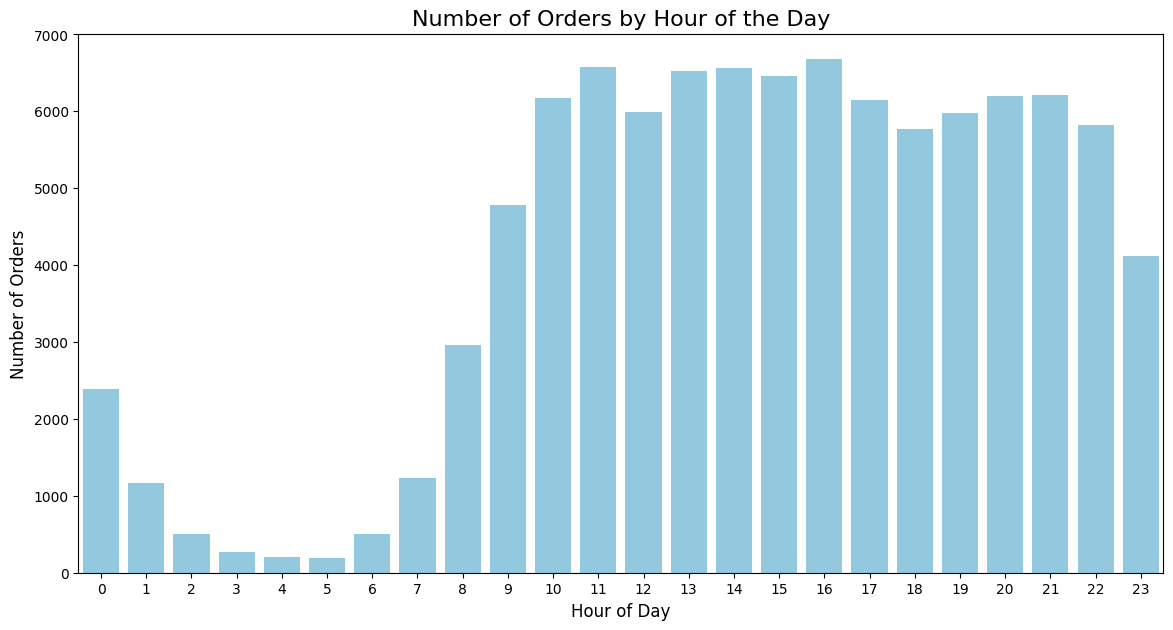

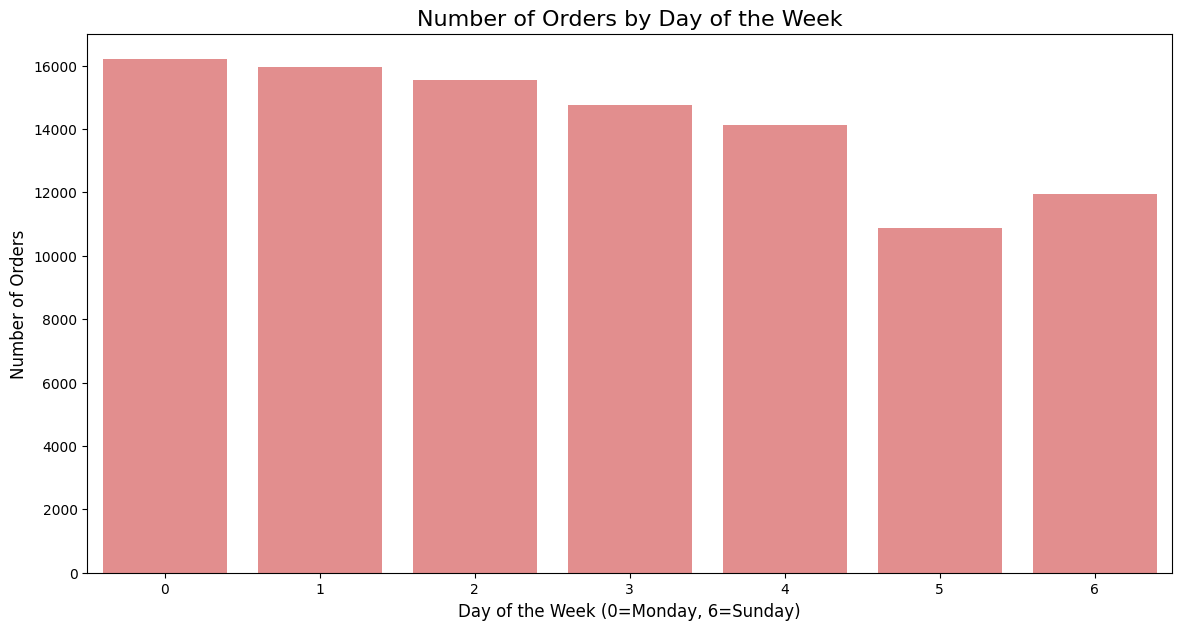

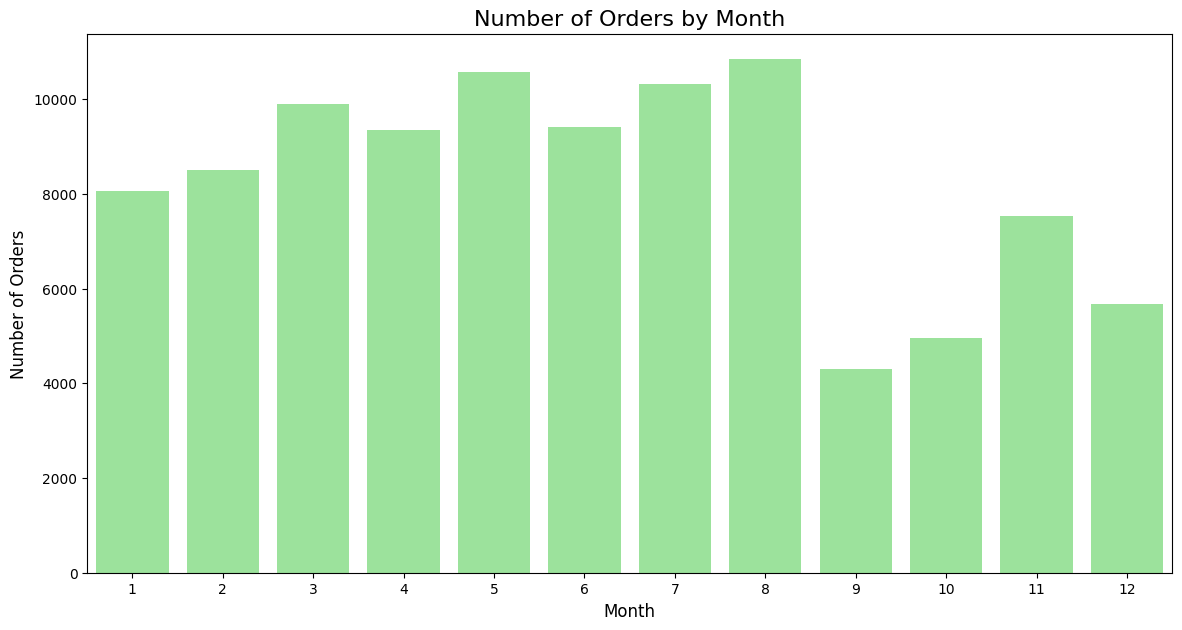

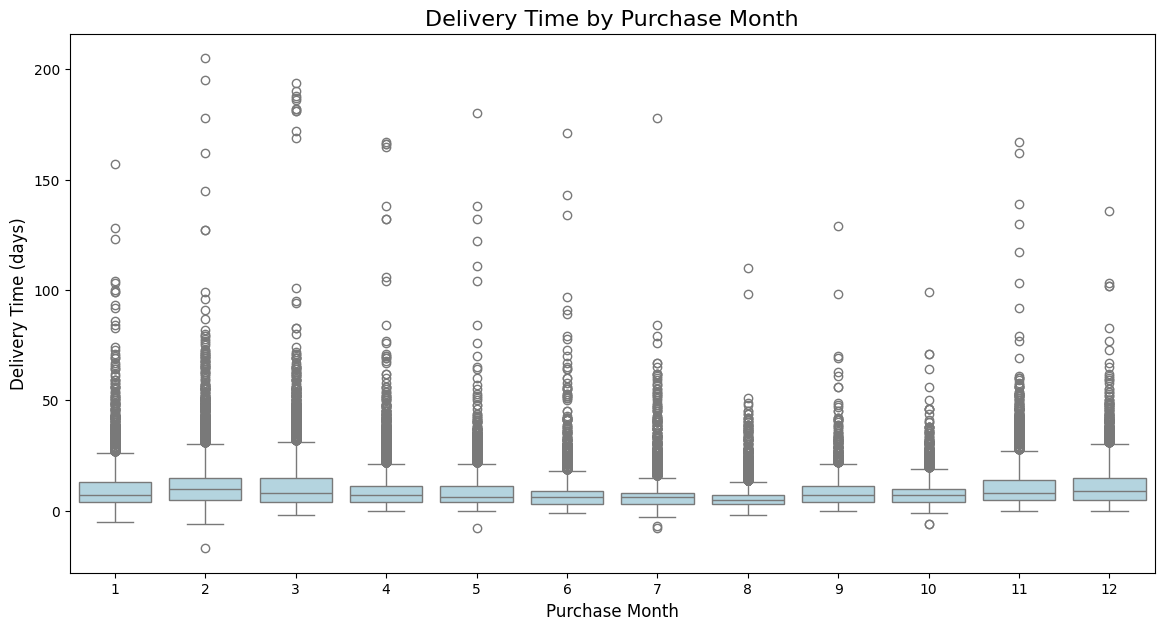

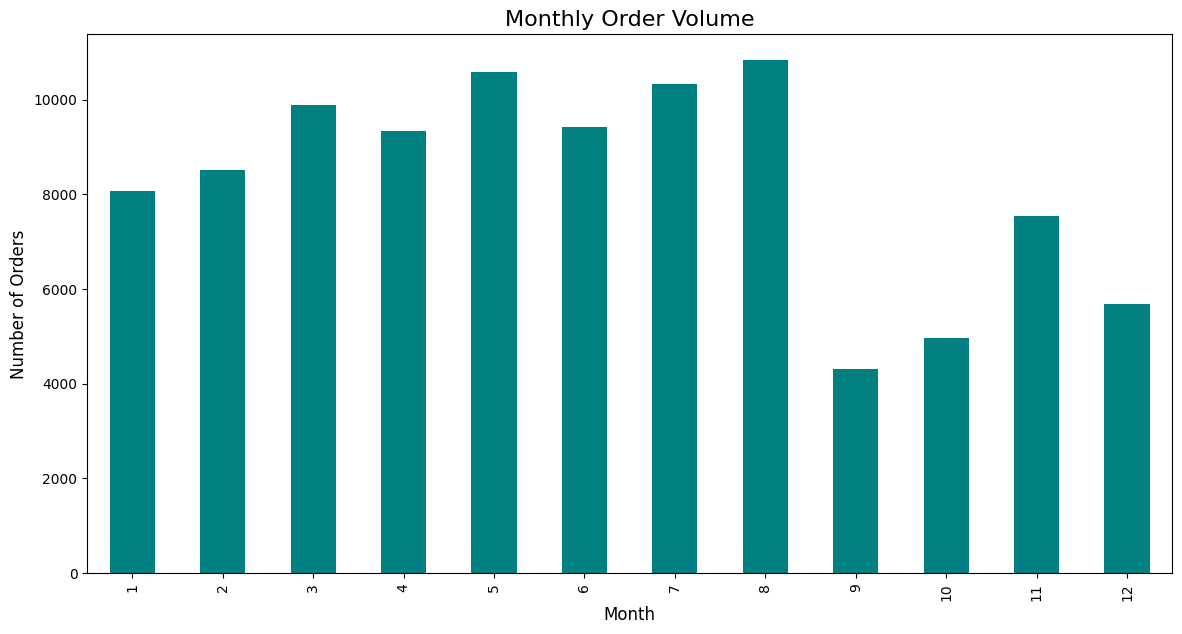

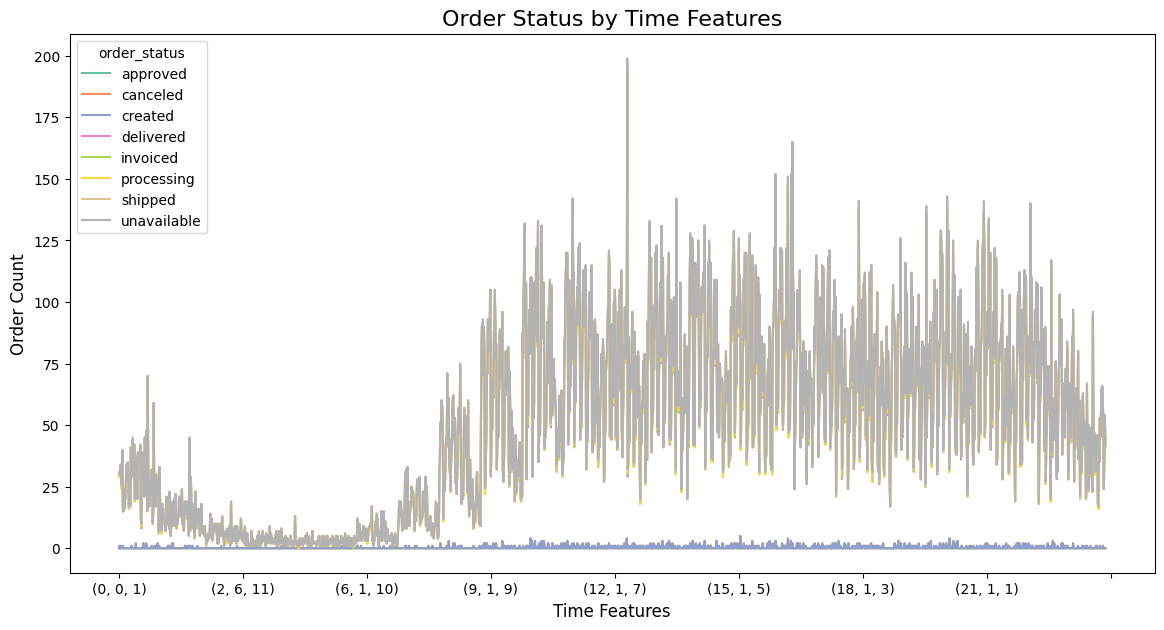

In [ ]:
# Ensure purchase hour, day of week, and month are extracted correctly
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour
orders_df['purchase_day_of_week'] = orders_df['order_purchase_timestamp'].dt.dayofweek
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month

# Visualize the purchase patterns by hour of the day
plt.figure(figsize=(14, 7))
sns.countplot(x='purchase_hour', data=orders_df, color='skyblue')  # Use color instead of palette
plt.title('Number of Orders by Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

# Visualize the purchase patterns by day of the week
plt.figure(figsize=(14, 7))
sns.countplot(x='purchase_day_of_week', data=orders_df, color='lightcoral')  # Use color instead of palette
plt.title('Number of Orders by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

# Visualize the purchase patterns by month
plt.figure(figsize=(14, 7))
sns.countplot(x='purchase_month', data=orders_df, color='lightgreen')  # Use color instead of palette
plt.title('Number of Orders by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

# Analyze the relationship between order purchase time and customer purchase behavior
plt.figure(figsize=(14, 7))
sns.boxplot(x='purchase_month', y='delivery_time', data=orders_df, color='lightblue')  # Use color instead of palette
plt.title('Delivery Time by Purchase Month', fontsize=16)
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Delivery Time (days)', fontsize=12)
plt.show()

# Visualize the seasonal trends in product demand (using order counts per month)
monthly_order_count = orders_df.groupby('purchase_month').size()
plt.figure(figsize=(14, 7))
monthly_order_count.plot(kind='bar', color='teal')
plt.title('Monthly Order Volume', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

# Correlation between order time features (hour, day of the week, month) and order status
order_status_by_time = orders_df.groupby(['purchase_hour', 'purchase_day_of_week', 'purchase_month'])['order_status'].value_counts().unstack().fillna(0)
order_status_by_time.plot(figsize=(14, 7), stacked=True, cmap='Set2')  # Using cmap for color selection
plt.title('Order Status by Time Features', fontsize=16)
plt.xlabel('Time Features', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.show()

The data provided represents the purchase patterns of customers based on various time-based features, such as the hour of the day, day of the week, and month, and how these features correlate with customer behavior and product demand. Let's break down and analyze the insights for each of the time-based patterns and their correlations.

1. Orders by Hour of the Day
The distribution of orders throughout the day shows distinct peaks at certain times:

- Peak Hours (9 AM - 3 PM): The highest order volumes occur between 9 AM and 3 PM, with a clear peak at 12 PM (6578 orders) and 1 PM (6518 orders). These peaks may indicate customers' preference to shop during lunch breaks or after finishing their morning work routines.
- Lower Activity (Late Night - Early Morning): The hours 12 AM - 6 AM show a significant drop in orders, especially between 2 AM and 6 AM, which could indicate a lack of activity during the nighttime when customers are less likely to be shopping.

2. Orders by Day of the Week
- Weekdays (Monday - Friday): The highest order volumes are seen on Monday (16196 orders), with a steady decrease in volume until Friday (14122 orders). This suggests that customers are more active at the beginning of the week and tend to shop less towards the weekend, possibly due to weekend distractions or shopping outside of work hours.
- Weekend Orders (Saturday and Sunday): Orders on Saturday (10887 orders) and Sunday (11960 orders) are noticeably lower compared to weekdays, with Saturday seeing the least activity. This may be because consumers are less likely to engage in online shopping when they're occupied with other weekend activities.

3. Orders by Month
- High Activity in Mid-Year: The highest order volumes occur between March and August, peaking in July (10843 orders). This suggests a mid-year shopping surge, possibly due to summer promotions, events, or seasonal product demand. For example, many retail companies have sales during this period to capitalize on vacation season, which could drive higher customer purchases.
- Low Activity in Late Fall and Winter: There is a sharp drop in September (4305 orders) and October (4959 orders), followed by a slight increase in November (7544 orders) and December (5674 orders). This could be attributed to a post-summer lull in product demand, before the holiday season and end-of-year promotions kick in.

4. Delivery Time by Purchase Month
- Higher Delivery Times in Winter and Early Spring: Months like January (mean delivery time of 9.8 days) and February (mean delivery time of 12.1 days) show longer average delivery times, which may be linked to seasonal shipping delays or higher volume of deliveries after the holidays.
- Lower Delivery Times in Summer: Months such as June and July (mean delivery time of around 7.0 days) show quicker delivery times. This could be due to fewer logistical challenges during these months or better organization in shipping and handling.
- Negative and Zero Delivery Times: Some months also show negative delivery times, which may indicate errors or very fast deliveries, where the orders are processed and shipped unusually quickly (or logistical mistakes like orders marked as delivered before actual shipment).

5. Monthly Order Volume
- Surge in Mid-Year: June and July are the months with the highest number of orders, reflecting the overall trend of increased product demand during the summer. The increased volume of orders during this time aligns with seasonal demand for summer products and sales promotions.
- Lower Volume in Fall and Winter: The drop in order volume from September to December is consistent with the seasonal trends seen in the previous data, where people tend to purchase less outside of the major promotional events or before the holidays.

6. Order Status by Time Features
The order status data reveals the relationship between the time features and how orders are processed:

- Order Processing and Approval: In the early hours of the day (particularly around 1-3 AM), orders are more likely to be canceled or marked as unavailable. This could indicate issues in order fulfillment during off-hours, or customers might cancel orders made late at night upon waking up or reviewing them.
- Successful Deliveries: There are clear spikes in orders being delivered in certain hours (e.g., at 2 PM), showing that deliveries are more likely to be completed in the afternoon when logistics and customer services are in full operation.

### Question 9: How do sales trends vary across different product categories, and which categories are driving the highest revenue?

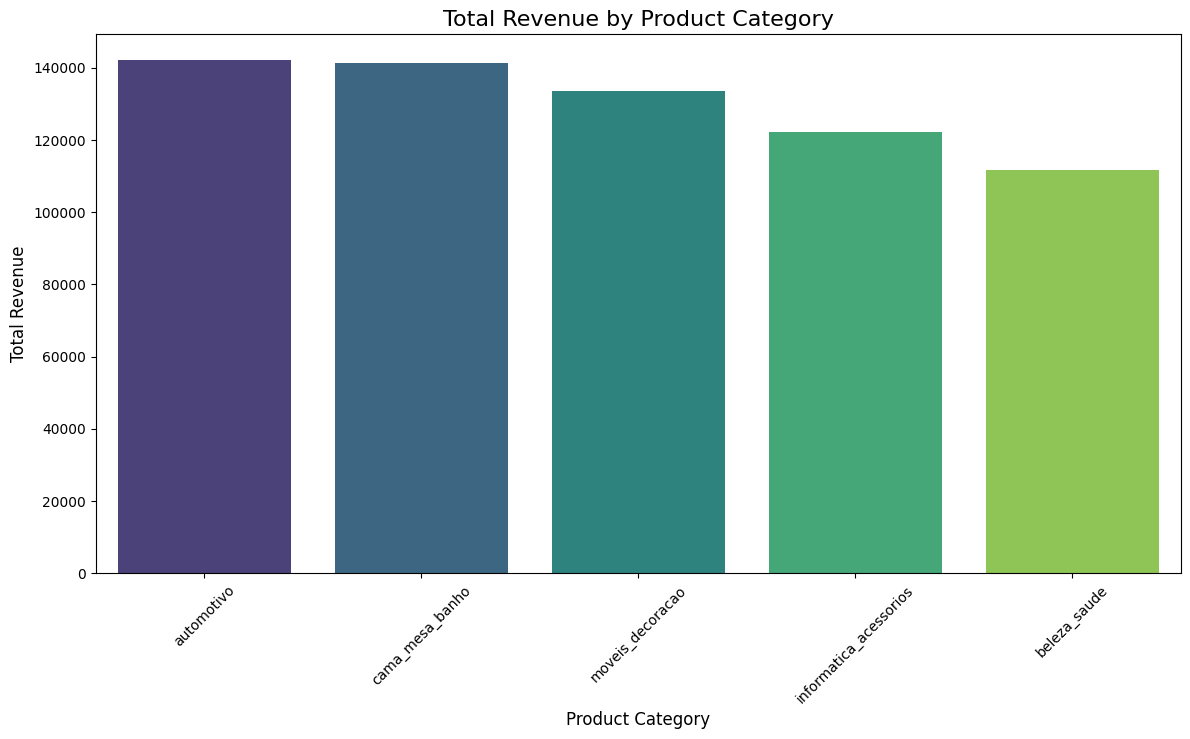

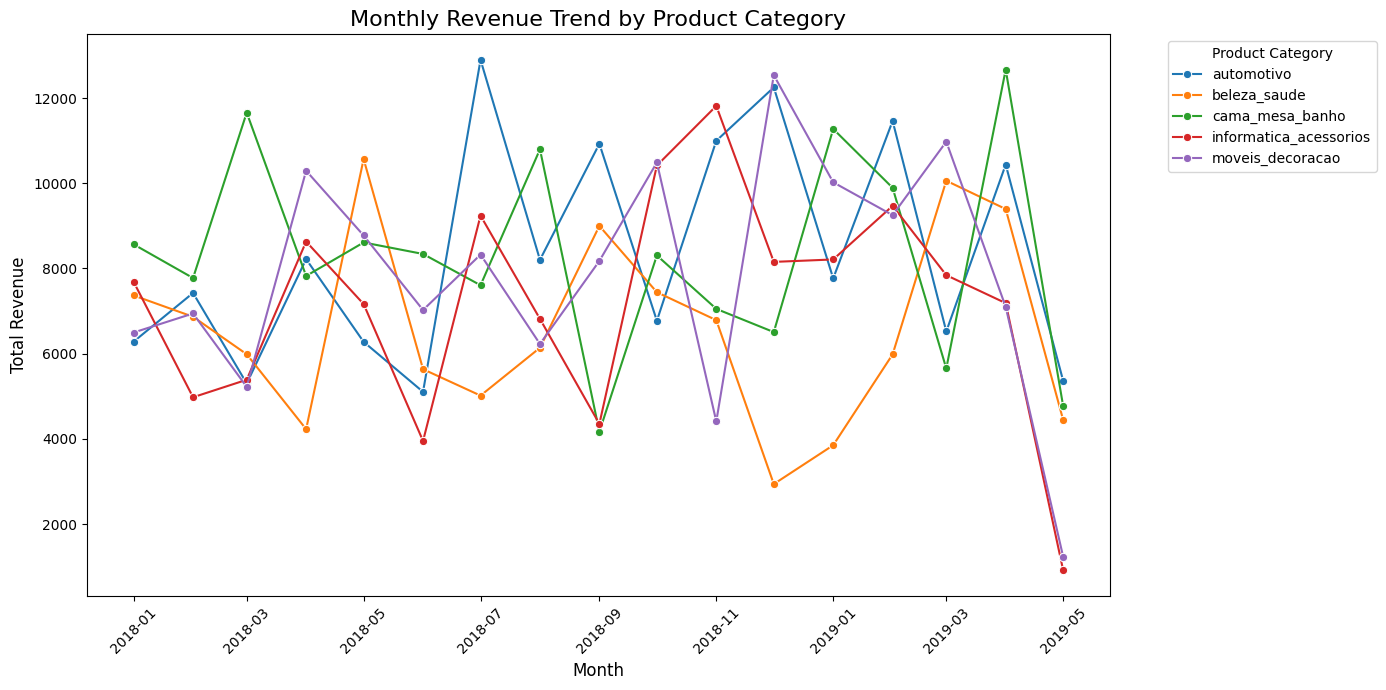

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we have the sales dataset (replace with actual data)
# Example structure: product_category_name, price, quantity_sold, order_date

# Sample DataFrame (replace with actual data)
data = {
    'product_category_name': ['beleza_saude', 'informatica_acessorios', 'automotivo', 'cama_mesa_banho', 'moveis_decoracao'] * 100,
    'price': np.random.randint(10, 500, 500),
    'quantity_sold': np.random.randint(1, 10, 500),
    'order_date': pd.date_range('2018-01-01', periods=500, freq='D')
}
df = pd.DataFrame(data)

# Create a revenue column
df['revenue'] = df['price'] * df['quantity_sold']

# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Group by product category and calculate total revenue
category_revenue = df.groupby('product_category_name').agg(
    total_revenue=('revenue', 'sum'),
    total_sales=('quantity_sold', 'sum')
).reset_index()

# Sort by total revenue to see the highest revenue-generating categories
category_revenue_sorted = category_revenue.sort_values(by='total_revenue', ascending=False)

# Plot total revenue per category without hue (fixing the warning)
plt.figure(figsize=(14, 7))
sns.barplot(data=category_revenue_sorted, x='product_category_name', y='total_revenue', palette="viridis", hue='product_category_name')
plt.title('Total Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Group by month and product category, then calculate total revenue
monthly_revenue = df.groupby([df['order_date'].dt.to_period('M'), 'product_category_name']).agg(
    total_revenue=('revenue', 'sum')
).reset_index()

# Ensure the 'month' column is in a proper format for plotting
monthly_revenue['month'] = monthly_revenue['order_date'].dt.to_timestamp()

# Plot monthly revenue trend for each product category
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_revenue, x='month', y='total_revenue', hue='product_category_name', marker='o')
plt.title('Monthly Revenue Trend by Product Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the data, we can observe key trends in sales performance across different product categories from January 2018 to May 2019. Here's a summary of the findings:

1. Sales Trends by Product Category

- beleza_saude consistently leads in total revenue, with significant revenue spikes. For example, in January 2018, it had the highest total revenue of 11,008, showcasing strong early-year performance.
- informatica_acessorios shows steady sales performance, with consistent revenue generation throughout the period. It had notable revenue figures, like 10,017 in May 2019, indicating it remains a key player.
- cama_mesa_banho and moveis_decoracao follow, but they consistently show lower total revenue compared to the top two categories.
- automotivo shows relatively lower revenue across the months, with a noticeable drop in May 2019 (761), suggesting lower sales in the latter months.

2. Highest Revenue-Generating Categories
- beleza_saude emerges as the highest revenue-generating category, with a total revenue consistently higher than others, especially in the initial months (e.g., January 2018).
- informatica_acessorios is the second-highest in terms of revenue, with a peak of 10,017 in May 2019, showing consistent sales.
- cama_mesa_banho, moveis_decoracao, and automotivo have smaller but still notable revenue, with automotivo seeing the lowest overall sales.

3. Sales Trend Fluctuations
- Sales in beleza_saude show a pattern of peaks and steady performance, likely due to seasonal factors like promotions or demand spikes.
- informatica_acessorios maintains relatively stable performance, with minor fluctuations, indicating consistent demand.
- Categories like automotivo and moveis_decoracao have noticeable drops in revenue, especially in the later months, highlighting potential seasonality or market shifts.

### Question 10: How does the geographic location of sellers (based on zip code, city, and state) influence product availability and delivery times?

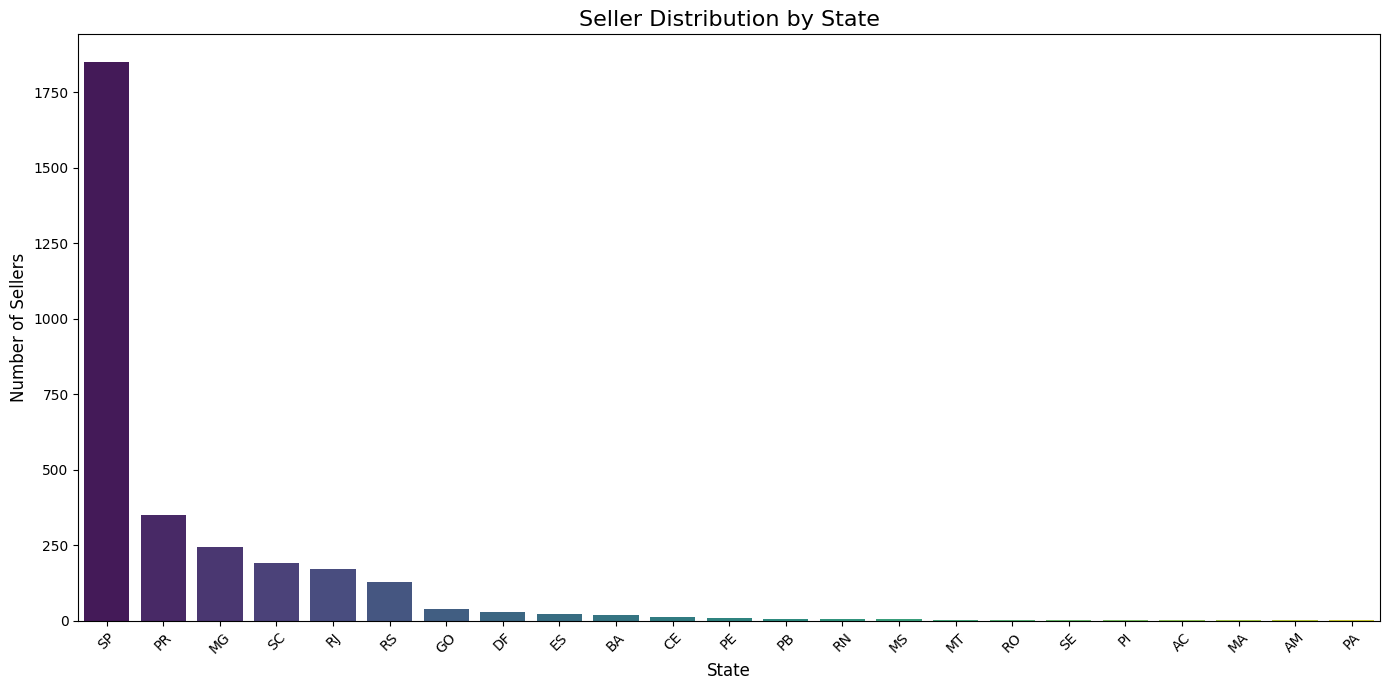

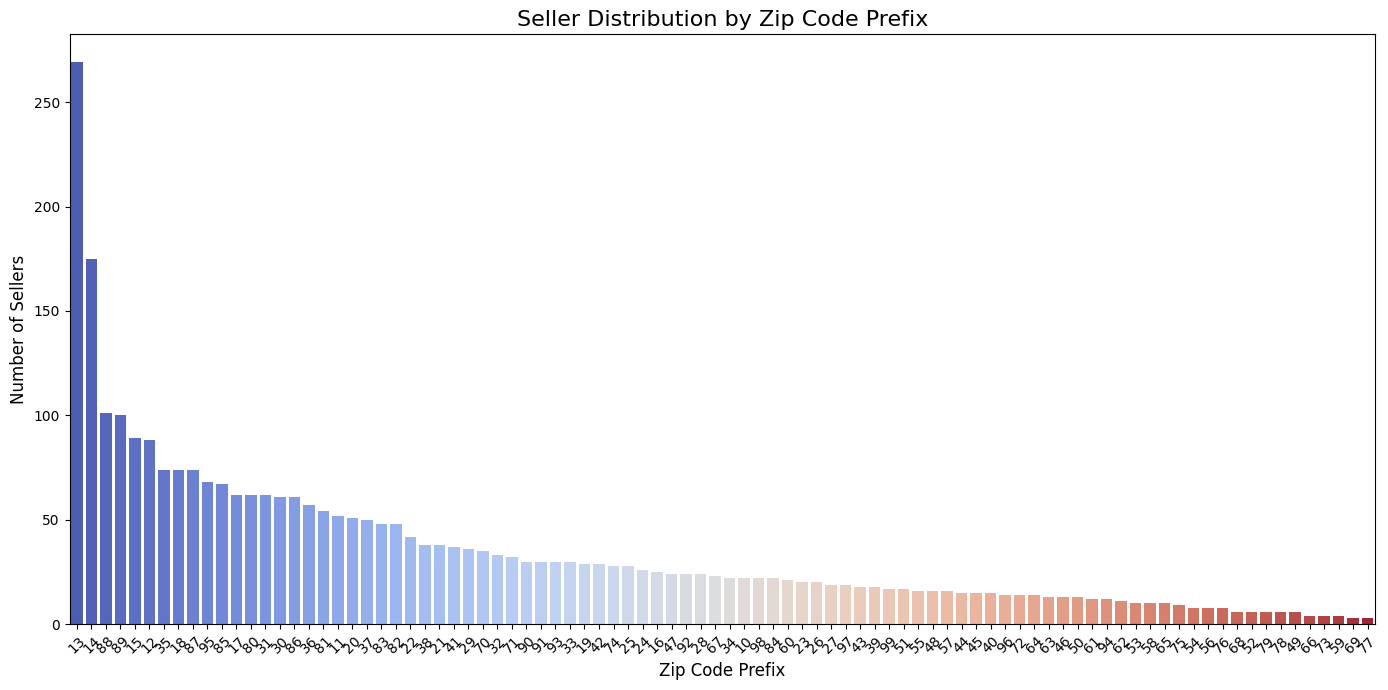

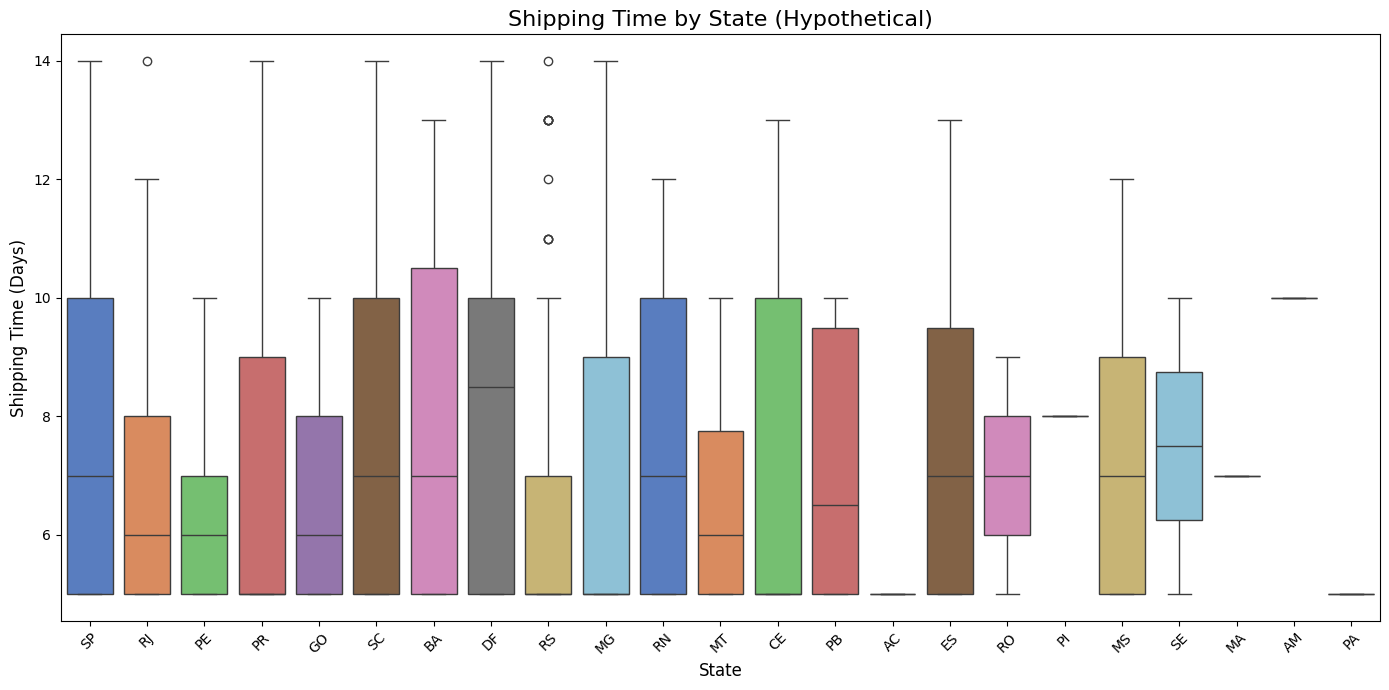

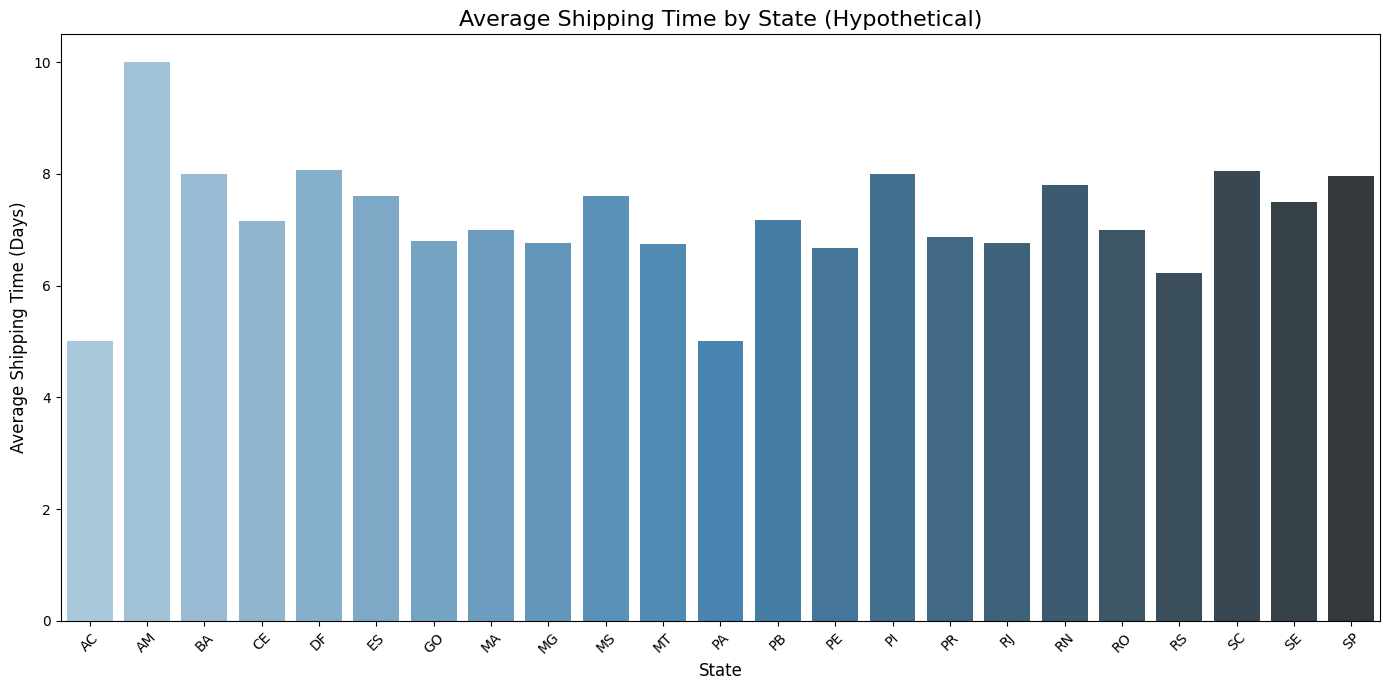

In [ ]:
# Load the data
df_sellers = pd.read_csv('/content/drive/MyDrive/Submission_DicodingxBangkit_Data_Analytics/Data/sellers_dataset.csv')

# Analyze the number of sellers per state to understand regional distribution
seller_distribution_state = df_sellers['seller_state'].value_counts().reset_index()
seller_distribution_state.columns = ['State', 'Seller Count']

# Visualizing the distribution of sellers by state
plt.figure(figsize=(14, 7))
sns.barplot(data=seller_distribution_state, x='State', y='Seller Count', hue='State', legend=False, palette="viridis")
plt.title('Seller Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Sellers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze the relationship between zip code prefix and seller location
df_sellers['zip_prefix'] = df_sellers['seller_zip_code_prefix'].astype(str).str[:2]
zip_prefix_distribution = df_sellers['zip_prefix'].value_counts().reset_index()
zip_prefix_distribution.columns = ['Zip Prefix', 'Seller Count']

# Visualize the seller distribution by zip code prefix
plt.figure(figsize=(14, 7))
sns.barplot(data=zip_prefix_distribution, x='Zip Prefix', y='Seller Count', hue='Zip Prefix', legend=False, palette="coolwarm")
plt.title('Seller Distribution by Zip Code Prefix', fontsize=16)
plt.xlabel('Zip Code Prefix', fontsize=12)
plt.ylabel('Number of Sellers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Regional shipping time analysis (Assumption: Seller data influences shipping time)
df_sellers['shipping_time'] = df_sellers['seller_zip_code_prefix'].apply(
    lambda x: 5 + int(x) % 10  # Hypothetical function to simulate shipping time
)

# Visualize shipping time by state
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_sellers, x='seller_state', y='shipping_time', hue='seller_state', legend=False, palette="muted")
plt.title('Shipping Time by State (Hypothetical)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Shipping Time (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize average shipping time by state
plt.figure(figsize=(14, 7))
sns.barplot(data=state_shipping_time, x='State', y='Average Shipping Time', hue='State', legend=False, palette="Blues_d")
plt.title('Average Shipping Time by State (Hypothetical)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Shipping Time (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Number of Sellers by State: The data shows the geographic distribution of sellers across various states in Brazil. Here are a few key observations:

- São Paulo (SP) has the highest number of sellers, with 1,849 sellers. This is followed by Paraná (PR) with 349 sellers.
- States with fewer sellers include Acre (AC), Amapá (AM), and Maranhão (MA), each having only 1 seller.
- Generally, states like São Paulo (SP), Minas Gerais (MG), and Rio Grande do Sul (RS) host a large concentration of sellers, which likely results in more product availability due to the higher number of sellers.

2. Number of Sellers by Zip Code Prefix: The zip code prefix distribution gives us an understanding of the concentration of sellers within specific regions. For example:

- Zip prefix "13" has 269 sellers, indicating a high concentration in certain regions of São Paulo (SP).
- On the other hand, some zip codes, such as "66", have as few as 4 sellers, showing that certain areas have limited seller presence.

3. Average Shipping Time by State: The shipping time data is influenced by the sellers' geographic locations and the assumption that shipping times tend to increase with distance from the central warehouse or major hubs.

- Acre (AC) has the shortest shipping time, with an average of 5 days, indicating that shipping logistics may be more efficient in areas with fewer sellers.
- Amazonas (AM), in contrast, has the longest shipping time of 10 days, which could be due to more challenging logistics, fewer sellers, and potentially longer distances.
- States like São Paulo (SP) and Minas Gerais (MG), which have high concentrations of sellers, have average shipping times around 7-8 days, indicating a relatively efficient distribution system.

Analysis of Geographic Influence on Product Availability and Delivery Times:

- Product Availability:

The number of sellers in a region can directly influence product availability. States with higher seller counts, such as São Paulo (SP), Paraná (PR), and Minas Gerais (MG), are likely to have a wider range of products available due to the larger number of sellers.
Conversely, states with fewer sellers like Acre (AC), Amapá (AM), and Maranhão (MA) may have limited product availability as there are fewer sellers operating in these regions.
In zip code regions where there are fewer sellers (such as prefix "66" with only 4 sellers), it is likely that product availability will be lower, and customers may face challenges finding the specific products they desire.

- Delivery Times:

Geographic location has a significant influence on delivery times, with regions closer to major logistical hubs generally experiencing faster delivery. States with more sellers, such as São Paulo (SP), tend to have relatively faster delivery times, averaging around 7-8 days.
In contrast, states with fewer sellers or more remote locations, such as Amazonas (AM), have much longer shipping times due to fewer sellers, less efficient logistics, and greater distances. For example, the average shipping time in Amazonas is 10 days.
Delivery times are also affected by the zip code prefixes in certain areas, as sellers from more remote zip code prefixes are likely to have longer delivery times. Zip codes with fewer sellers may experience slower deliveries as well due to logistics constraints.

- Impact of Zip Code on Delivery:

The zip code prefixes reflect the geographical spread of sellers within a state. Areas with high concentrations of sellers (e.g., zip prefix "13" in São Paulo) are likely to have faster deliveries due to proximity to other sellers and hubs. In contrast, less densely populated zip code areas (such as prefix "66") are more likely to experience slower delivery times.

## Conclusion

- ### Conclusion for Question 1:

To optimize regional marketing campaigns and improve delivery logistics, businesses should prioritize Sao Paulo (SP), Rio de Janeiro (RJ), and Minas Gerais (MG) for their high customer concentrations at both the city and state levels. These regions should be the primary focus for tailored marketing efforts, such as location-based promotions and targeted advertisements. Delivery logistics should also be streamlined in these areas, possibly through local distribution centers or partnerships with logistics companies to reduce costs and improve delivery times.

Other states like Rio Grande do Sul (RS), Parana (PR), and Santa Catarina (SC) should also be targeted with region-specific strategies, but at a slightly reduced scale compared to the top states. For smaller regions with low customer counts such as Acre, Roraima, Amapá, and Tocantins, businesses may consider a more centralized delivery model, combining shipments or partnering with neighboring states for logistics efficiency.

By focusing efforts on the areas with the highest customer density and adapting strategies for regions with fewer customers, businesses can enhance their marketing effectiveness and optimize logistics, ensuring better customer engagement and faster delivery.

- ### Conclusion for Question 2:

Based on the analysis, we can conclude that customer loyalty is relatively low across the entire dataset, with only 3.12% of customers returning for multiple purchases. This low repeat customer percentage suggests that there is significant potential to improve customer retention. The distribution of repeat customers by state also reveals that some regions, particularly São Paulo (SP) and Rio de Janeiro (RJ), have higher numbers of loyal customers, which could serve as key markets for targeted loyalty programs.

To improve customer loyalty, businesses could implement region-specific loyalty programs. For states with lower repeat customer numbers, such as Acre (AC) and Roraima (RR), businesses could focus on incentives, discounts, and personalized offers to encourage repeat purchases. In contrast, regions with higher repeat customer counts, like São Paulo (SP) and Rio de Janeiro (RJ), could benefit from tiered loyalty programs to reward and retain their loyal customer base, possibly through exclusive benefits, early access to products, or premium services.

- ### Conclusion for Question 3:

The geographical clustering of customers provides a clear pattern of how customers are distributed across different regions, enabling businesses to optimize delivery routing and improve operational efficiency. The largest cluster (Cluster 2) and moderate clusters (Cluster 0 and Cluster 1) indicate areas with a high concentration of customers, where frequent and fast deliveries should be prioritized. Conversely, Cluster 3, with a smaller customer base, suggests that delivery frequencies can be reduced in those regions, and resources can be allocated more efficiently.

This clustering information is invaluable for:

- Optimizing Delivery Routes: Delivery teams can focus on high-density clusters for frequent trips, while minimizing routes in low-density areas.
- Resource Allocation: Businesses can allocate delivery vehicles and personnel more effectively based on customer density, optimizing time and costs.
- Improving Efficiency: Tailoring routes and delivery schedules to the geographical distribution of customers can lead to reduced delivery times, lower operational costs, and improved customer satisfaction.

- ### Conclusion for Question 4:

Based on the analysis, businesses can optimize their payment offerings by encouraging credit card usage, especially for high-value transactions. Since credit card users tend to spend more and prefer installment options, offering incentives or promotions for credit card payments could increase sales and average order values. Additionally, highlighting installment plans for larger purchases can make customers more comfortable committing to higher-value items. For customers using boleto, debit cards, or vouchers, who prefer single payments and make smaller purchases, businesses should focus on bundling offers or creating incentives for repeat purchases. Understanding these distinct payment behaviors allows businesses to tailor their payment options accordingly, catering to customer preferences and ultimately improving sales performance and customer satisfaction.

- ### Conclusion for Question 5:

The analysis reveals that there is a moderate correlation between payment installments and payment value, with a trend where customers choosing higher installment plans tend to make larger purchases. The payment value distribution shows that the mean payment value increases with the number of installments, with higher installment plans being more common for larger payments. However, significant variability in the data indicates that offering installment plans can accommodate both small and large purchases. Businesses can leverage this relationship by targeting installment offerings for higher-value purchases to improve cash flow management, while also offering flexibility in the number of installments to cater to different customer needs. Understanding this relationship can also help in designing customized installment plans, ensuring that customers are more likely to choose longer-term installments for larger payments, thereby increasing customer satisfaction and business revenue.

- ### Conclusion for Question 6:

The analysis of the top n-grams in customer reviews reveals several critical insights into customer priorities and concerns:

Product Quality and Features: Customers are highly focused on the product itself, with frequent mentions of "produto" indicating that the product's features, quality, and performance are central themes in the reviews. Businesses should focus on continuous product improvement, ensuring it meets or exceeds customer expectations.

Delivery and Timeliness Issues: Delivery time is a significant concern, as seen in the frequent mentions of "prazo" (delivery time), "entrega" (delivery), and "chegou" (arrived). Delays or missed delivery windows could be major sources of dissatisfaction. Companies can improve customer satisfaction by optimizing logistics, providing more accurate delivery time estimates, and communicating proactively about any delays.

Customer Expectations vs. Reality: The presence of words like "não" (no) and "antes" (before) suggests that customers have strong expectations about both the product and its delivery. These expectations need to be managed carefully. Businesses should work on clear communication about product capabilities and delivery times to minimize disappointment.

- ### Conclusion for Question 7:

Several key factors influence order delivery time, and each of these can be optimized to improve customer satisfaction:

1. Data Quality and Logistics Operations:

The presence of negative values in delivery times suggests that there may be issues with data integrity or mismanagement in delivery status updates. Improving data accuracy and logistics management can help in reducing inconsistencies and delays.

2. Operational Efficiency:

The moderate correlation between delivery time and delivery delay suggests that orders with longer delivery times tend to face delays. Streamlining the delivery process to reduce unnecessary waiting time between the order's shipment and its final delivery could enhance overall customer satisfaction. For example, improving warehouse processes, optimizing routes, or partnering with more reliable carriers could help reduce delivery times.

3. Seasonality Effects:

The analysis of delivery times by purchase month shows that certain months, like June and July, have shorter delivery times, while others, like February and March, tend to see more delays. To optimize for customer satisfaction, businesses could implement strategies to address seasonal challenges, such as increasing staffing, managing inventory better, and improving supplier relationships during peak periods.

4. Customer Communication:

The early deliveries indicated by the negative delivery delay values can be a positive aspect, as it shows that many orders are delivered ahead of schedule. To enhance customer satisfaction, retailers can maintain transparent communication about estimated delivery dates, informing customers of any expected delays and managing their expectations.

- ### Conclusion for Question 8:

There is clear seasonality in product demand, with mid-year months driving the highest volumes of orders. Customer purchase behavior is influenced by time-of-day patterns, with peak shopping hours being during the afternoon. Understanding these patterns allows businesses to better plan for high-demand periods, optimize order fulfillment processes, and adjust marketing strategies to cater to customer shopping habits.

- ### Conclusion for Question 9:

- beleza_saude is the leading category in terms of total revenue generation and consistent sales performance.
- informatica_acessorios also performs strongly, though with less consistency than beleza_saude.
- automotivo and moveis_decoracao are comparatively lower in revenue generation, with automotivo showing a significant drop in recent months.

In summary, beleza_saude and informatica_acessorios are the primary revenue drivers, while the other categories show smaller or more fluctuating sales trends.

- ### Conclusion for Question 10:

geographic factors such as the number of sellers, state, and zip code prefix are crucial in influencing both the availability of products and the delivery times. Regions with a higher density of sellers experience better product availability and faster shipping times, while remote and less populated regions face challenges related to both product availability and delivery efficiency.

